In [273]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader
!pip install nbimporter


### Libraries

In [274]:
import pandas as pd#data structures and operations for manipulating numerical tables and time series.
import pandas_datareader.data as data#Up-to-date remote data access for pandas.
import datetime as dt#supplies classes for manipulating dates and times
from datetime import timedelta
import matplotlib.pyplot as plt#plotting library for the Python.
import seaborn as sns;# visualizacion
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings
import itertools
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.api as smtsa
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,  mean_squared_log_error, median_absolute_error
from statsmodels.tsa.ar_model import AR,ARResults# Load specific forecasting tools
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from itertools import product
from math import sqrt
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly
from fbprophet.diagnostics import performance_metrics
from fbprophet.diagnostics import cross_validation
from fbprophet.plot import plot_cross_validation_metric
import plotly.express as px
import plotly.graph_objects as go
import nbimporter
import Plots as Plo

In [275]:
#!pip install pandas-datareader
#!pip install seaborn
#!conda install -c plotly plotly
#!pip install pmdarima
#!conda install -c conda-forge fbprophet -y
#!pip install fbprophet
#!pip install pystan==2.17.1.0
#!pip install nbimporter

### Contents

### I.- Describe Data :

This is research about 2 companies of renewable energy in the stock market. The problematic here is a forecasting, that consists of predicting the values in the future of these companies, we are working with time series.


#### A.- EDP Renováveis (0ML1.IL)

In [276]:
# We define the ticket from the companies that we are interested in research.

ticker = ['0ML1.IL']#0ML1.IL london
                    
                    

# We would like all available data from 01-01-2016 until today
start_date = '2016-01-01'

today = dt.date.today()
yesterday = today - timedelta(days=1)
end_date = yesterday

# User pandas_reader.data.DataReader to load the desired data.
EDPR= data.DataReader('0ML1.IL', 'yahoo', start_date, end_date )
EDPR.head(7)

High     Low     Open    Close   Volume  Adj Close
Date                                                             
2016-01-04  7.13510  7.1351  7.13510  7.13510      0.0   6.866567
2016-01-05  7.30060  7.3006  7.30060  7.30060    150.0   7.025838
2016-01-06  7.21513  7.1365  7.22580  7.21513   1331.0   6.943584
2016-01-07  7.23450  7.1250  7.17600  7.21950  11142.0   6.947790
2016-01-08  7.27900  7.1965  7.24165  7.19650  13085.0   6.925656
2016-01-11  7.15700  7.0110  7.15700  7.02300   3064.0   6.758685
2016-01-12  7.11700  7.1170  7.11700  7.11700    176.0   6.849148

In [277]:
EDPR.shape

(1614, 6)

In [278]:
EDPR.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1614 entries, 2016-01-04 to 2022-05-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1614 non-null   float64
 1   Low        1614 non-null   float64
 2   Open       1614 non-null   float64
 3   Close      1614 non-null   float64
 4   Volume     1614 non-null   float64
 5   Adj Close  1614 non-null   float64
dtypes: float64(6)
memory usage: 88.3 KB


In [279]:
df_EDPR= EDPR.copy()
#filling the missing values for Saturday and Sunday
df_EDPR = df_EDPR.resample('1D').ffill()
df_EDPR = df_EDPR.resample('1D').bfill()

# ADD Frecuency information
df_EDPR.index = pd.DatetimeIndex(df_EDPR.index).to_period('D')

df_EDPR.head(7)

High     Low     Open    Close   Volume  Adj Close
Date                                                             
2016-01-04  7.13510  7.1351  7.13510  7.13510      0.0   6.866567
2016-01-05  7.30060  7.3006  7.30060  7.30060    150.0   7.025838
2016-01-06  7.21513  7.1365  7.22580  7.21513   1331.0   6.943584
2016-01-07  7.23450  7.1250  7.17600  7.21950  11142.0   6.947790
2016-01-08  7.27900  7.1965  7.24165  7.19650  13085.0   6.925656
2016-01-09  7.27900  7.1965  7.24165  7.19650  13085.0   6.925656
2016-01-10  7.27900  7.1965  7.24165  7.19650  13085.0   6.925656

In [280]:
df_EDPR.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 2329 entries, 2016-01-04 to 2022-05-20
Freq: D
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2329 non-null   float64
 1   Low        2329 non-null   float64
 2   Open       2329 non-null   float64
 3   Close      2329 non-null   float64
 4   Volume     2329 non-null   float64
 5   Adj Close  2329 non-null   float64
dtypes: float64(6)
memory usage: 127.4 KB


In [281]:
df_EDPR.to_csv("EDPR.csv")# reserve and use in modelling

#### B.- Vestas Wind Systems A/S (0NMK.IL)

In [282]:
# We define the ticket from the companies that we are interested in research.

ticker = ['0NMK.IL']
                    
# We would like all available data from 01-01-2016 until today
start_date = '2016-01-01'
today = dt.date.today()
yesterday = today - timedelta(days=1)
end_date = yesterday

VWS= data.DataReader('0NMK.IL', 'yahoo', start_date, end_date)
VWS.head(7)

High         Low        Open       Close  Volume   Adj Close
Date                                                                          
2016-01-04  483.998474  475.468903  473.500000  475.468903  2528.0  464.095367
2016-01-05  476.799988  465.432190  479.899994  475.200012  1738.0  463.832947
2016-01-06  476.299988  459.814911  476.299988  468.399994  8847.0  457.195557
2016-01-07  464.006683  448.768188  457.125000  460.307312  1021.0  449.296448
2016-01-08  465.361145  449.641602  457.500000  458.308014  6636.0  447.345001
2016-01-11  446.326263  436.299988  439.125000  441.865479  1780.0  431.295746
2016-01-12  457.166840  442.000000  441.625000  446.084747  1560.0  435.414154

In [283]:
VWS.shape

(1614, 6)

In [284]:
VWS.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1614 entries, 2016-01-04 to 2022-05-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1614 non-null   float64
 1   Low        1614 non-null   float64
 2   Open       1614 non-null   float64
 3   Close      1614 non-null   float64
 4   Volume     1614 non-null   float64
 5   Adj Close  1614 non-null   float64
dtypes: float64(6)
memory usage: 88.3 KB


In [285]:
df_VWS= VWS.copy()
#filling the missing values for Saturday and Sunday
df_VWS = df_VWS.resample('1D').ffill()
df_VWS= df_VWS.resample('1D').bfill()

# ADD Frecuency information
df_VWS.index = pd.DatetimeIndex(df_VWS.index).to_period('D')
df_VWS.head(7)

High         Low        Open       Close  Volume   Adj Close
Date                                                                          
2016-01-04  483.998474  475.468903  473.500000  475.468903  2528.0  464.095367
2016-01-05  476.799988  465.432190  479.899994  475.200012  1738.0  463.832947
2016-01-06  476.299988  459.814911  476.299988  468.399994  8847.0  457.195557
2016-01-07  464.006683  448.768188  457.125000  460.307312  1021.0  449.296448
2016-01-08  465.361145  449.641602  457.500000  458.308014  6636.0  447.345001
2016-01-09  465.361145  449.641602  457.500000  458.308014  6636.0  447.345001
2016-01-10  465.361145  449.641602  457.500000  458.308014  6636.0  447.345001

In [286]:
df_VWS.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 2329 entries, 2016-01-04 to 2022-05-20
Freq: D
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2329 non-null   float64
 1   Low        2329 non-null   float64
 2   Open       2329 non-null   float64
 3   Close      2329 non-null   float64
 4   Volume     2329 non-null   float64
 5   Adj Close  2329 non-null   float64
dtypes: float64(6)
memory usage: 127.4 KB


In [287]:
df_VWS.to_csv("VWS.csv")# reserve and use in modelling

### II.- Exploratory Data Analysis (EDA) 

#### A.- EDP Renováveis (0ML1.IL)

In [288]:
EDPR.head()

High     Low     Open    Close   Volume  Adj Close
Date                                                             
2016-01-04  7.13510  7.1351  7.13510  7.13510      0.0   6.866567
2016-01-05  7.30060  7.3006  7.30060  7.30060    150.0   7.025838
2016-01-06  7.21513  7.1365  7.22580  7.21513   1331.0   6.943584
2016-01-07  7.23450  7.1250  7.17600  7.21950  11142.0   6.947790
2016-01-08  7.27900  7.1965  7.24165  7.19650  13085.0   6.925656

In [289]:
EDPR.describe()

High          Low         Open        Close        Volume  \
count  1614.000000  1614.000000  1614.000000  1614.000000  1.614000e+03   
mean     11.520927    11.318900    11.418358    11.415723  1.103961e+05   
std       5.751314     5.503765     5.631719     5.620216  2.412899e+05   
min       5.735000     5.624000     5.698150     5.649900  0.000000e+00   
25%       7.023140     6.990715     7.007350     7.009088  1.574500e+03   
50%       8.755000     8.727500     8.744650     8.735000  1.159800e+04   
75%      16.095001    15.700153    15.845000    15.862500  1.002808e+05   
max      26.400000    25.350000    25.825001    25.900000  3.003414e+06   

         Adj Close  
count  1614.000000  
mean     11.277539  
std       5.648178  
min       5.478112  
25%       6.830302  
50%       8.595358  
75%      15.735012  
max      25.691839

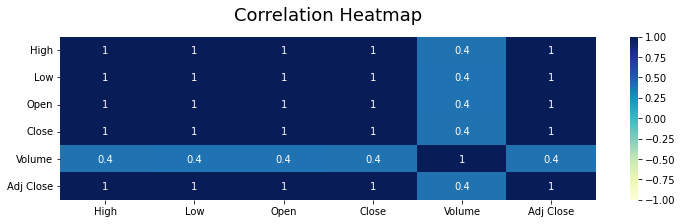

In [290]:
Plo.plot_corr(EDPR)

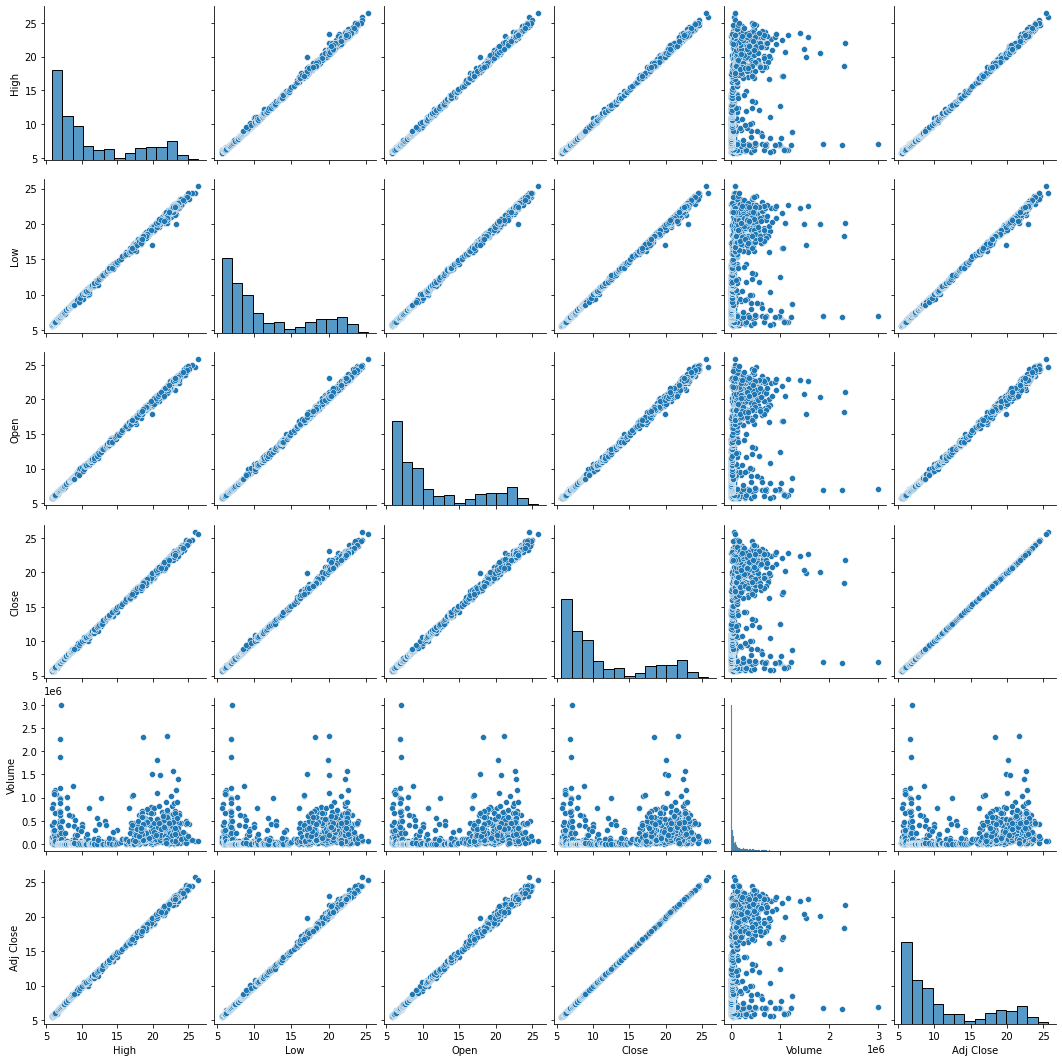

In [291]:
sns.pairplot(EDPR)

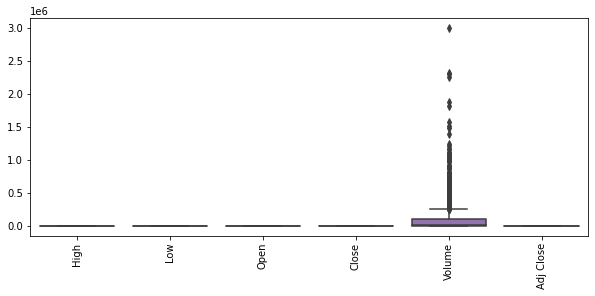

In [292]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10,4))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.boxplot(data=EDPR)

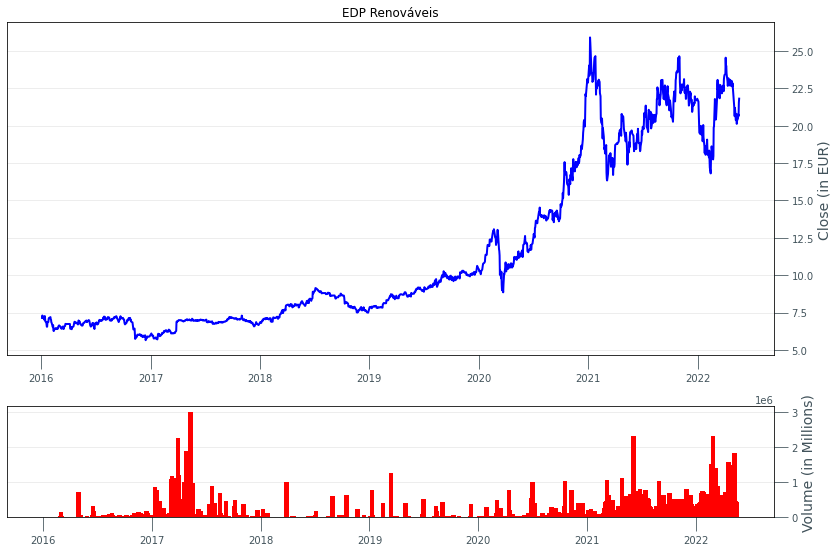

In [293]:
Plo.Close_Vol(EDPR, 'EDP Renováveis')

In [294]:
# We selected the main column  for us
close_EDPR= EDPR['Close']

close_EDPR = pd.DataFrame(close_EDPR).dropna().rename(columns= {0: 'Date', 1: 'Close'})
close_EDPR.head()

Close
Date               
2016-01-04  7.13510
2016-01-05  7.30060
2016-01-06  7.21513
2016-01-07  7.21950
2016-01-08  7.19650

In [295]:
close_EDPR.tail()

Close
Date                 
2022-05-16  20.480000
2022-05-17  20.754999
2022-05-18  20.639999
2022-05-19  21.545000
2022-05-20  21.805000

In [296]:
close_EDPR.describe()

Close
count  1614.000000
mean     11.415723
std       5.620216
min       5.649900
25%       7.009088
50%       8.735000
75%      15.862500
max      25.900000

In [297]:
EDPR_df = close_EDPR

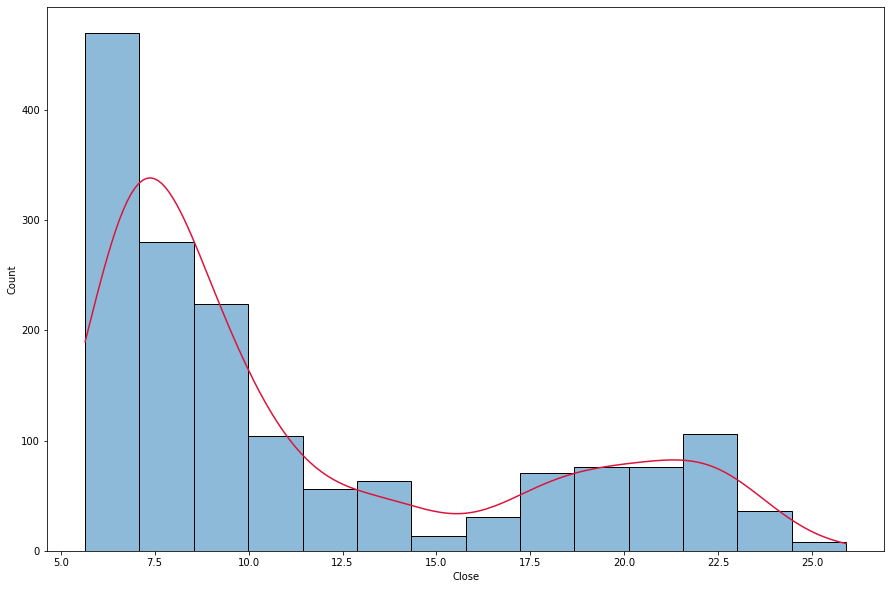

In [298]:
figsize=(3,3)
ax= sns.histplot(EDPR_df['Close'], kde=True);
ax.lines[0].set_color('crimson')

In [299]:
EDPR_df.to_csv("EDPR_df.csv")

In [300]:
EDPR_df= pd.read_csv('EDPR_df.csv')#We decided works with a CSV for modeling 
EDPR_df.tail()

Date      Close
1609  2022-05-16  20.480000
1610  2022-05-17  20.754999
1611  2022-05-18  20.639999
1612  2022-05-19  21.545000
1613  2022-05-20  21.805000

In [301]:
EDPR_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1614 entries, 0 to 1613
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1614 non-null   object 
 1   Close   1614 non-null   float64
dtypes: float64(1), object(1)
memory usage: 25.3+ KB


#### B.- Vestas Wind Systems A/S (0NMK.IL)

In [302]:
VWS.head()

High         Low        Open       Close  Volume   Adj Close
Date                                                                          
2016-01-04  483.998474  475.468903  473.500000  475.468903  2528.0  464.095367
2016-01-05  476.799988  465.432190  479.899994  475.200012  1738.0  463.832947
2016-01-06  476.299988  459.814911  476.299988  468.399994  8847.0  457.195557
2016-01-07  464.006683  448.768188  457.125000  460.307312  1021.0  449.296448
2016-01-08  465.361145  449.641602  457.500000  458.308014  6636.0  447.345001

In [303]:
VWS.describe()

High          Low         Open        Close        Volume  \
count  1614.000000  1614.000000  1614.000000  1614.000000  1.614000e+03   
mean    421.261792   411.376228   416.310531   416.206366  2.148224e+05   
std     156.570902   154.391140   155.386983   155.436015  3.960253e+05   
min     115.360001   113.000000   113.059998   115.260002  0.000000e+00   
25%     251.300003   244.417854   248.342255   248.000000  3.226975e+04   
50%     445.750000   436.827759   440.572052   441.046539  7.841000e+04   
75%     553.571091   542.880447   548.787491   547.975006  2.036545e+05   
max     730.728699   719.700012   724.500000   719.700012  4.502410e+06   

         Adj Close  
count  1614.000000  
mean    410.321127  
std     152.298510  
min     114.276527  
25%     246.414211  
50%     432.609161  
75%     539.461243  
max     711.659607

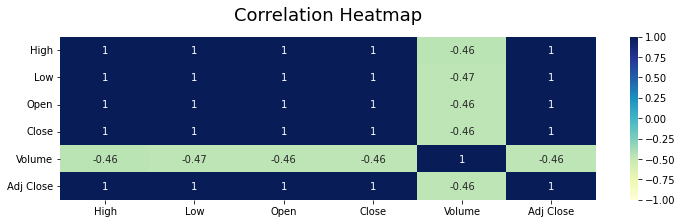

In [304]:
Plo.plot_corr(VWS)

https://www.investopedia.com/articles/active-trading/090115/use-market-volume-data-determine-bottom.asp

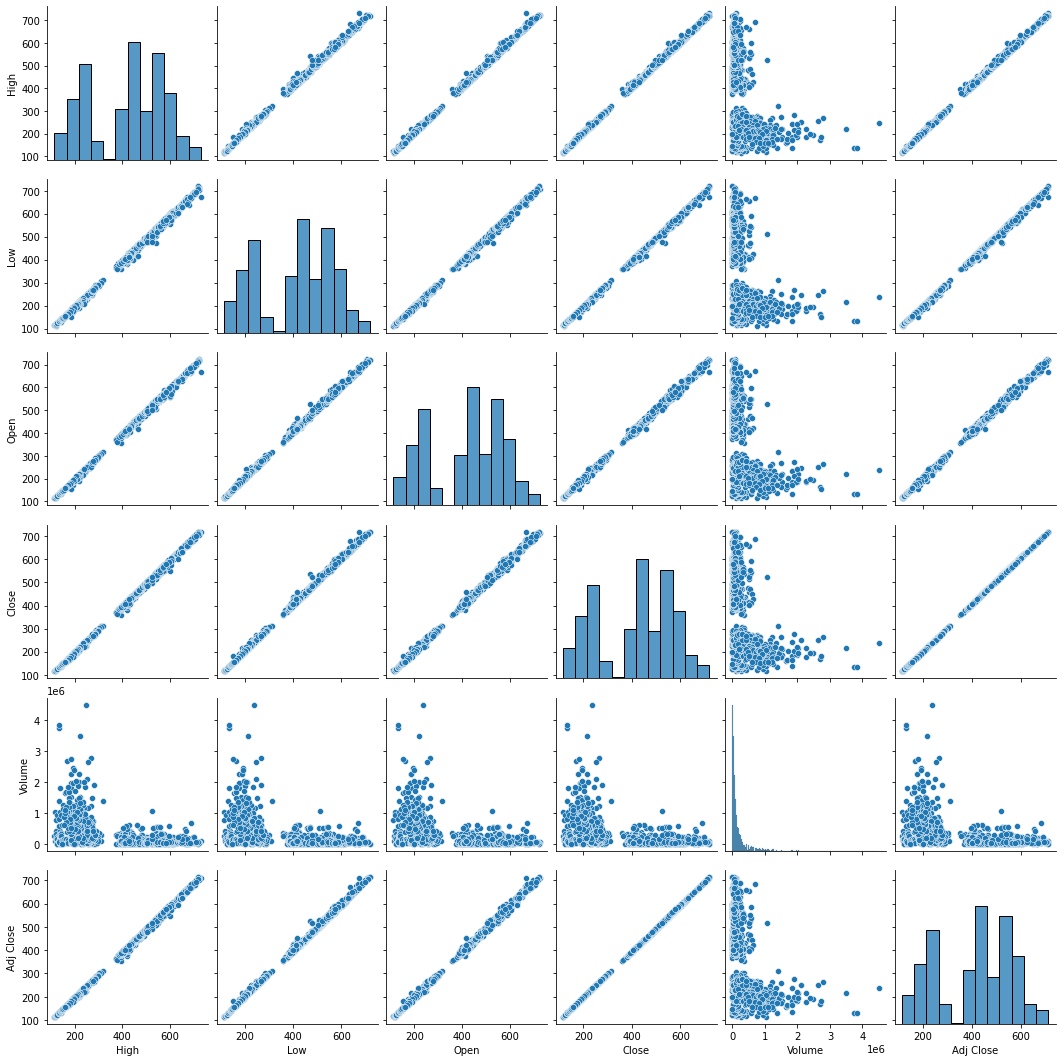

In [305]:
sns.pairplot(VWS)

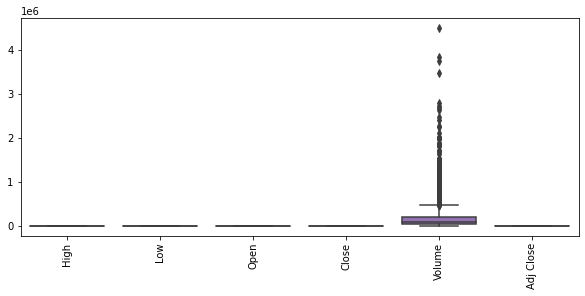

In [306]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10,4))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.boxplot(data=VWS)

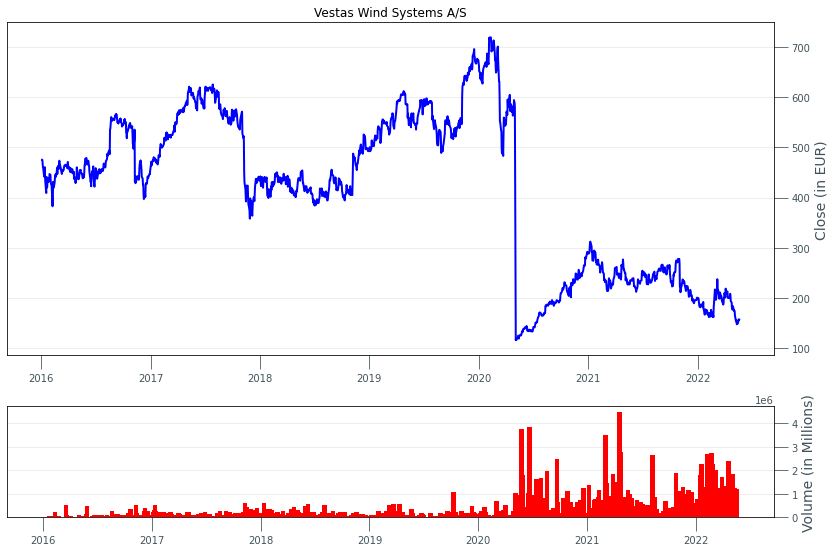

In [307]:
Plo.Close_Vol(VWS, 'Vestas Wind Systems A/S')

In [308]:
# We selected the main column  for us
close_VWS= VWS['Close']

close_VWS= pd.DataFrame(close_VWS).dropna().rename(columns= {0: 'Date', 1: 'Close'})
close_VWS.tail()

Close
Date                  
2022-05-16  149.149994
2022-05-17  151.960007
2022-05-18  155.850006
2022-05-19  157.080002
2022-05-20  156.399994

In [309]:
close_VWS.describe()

Close
count  1614.000000
mean    416.206366
std     155.436015
min     115.260002
25%     248.000000
50%     441.046539
75%     547.975006
max     719.700012

In [310]:
VWS_df = close_VWS

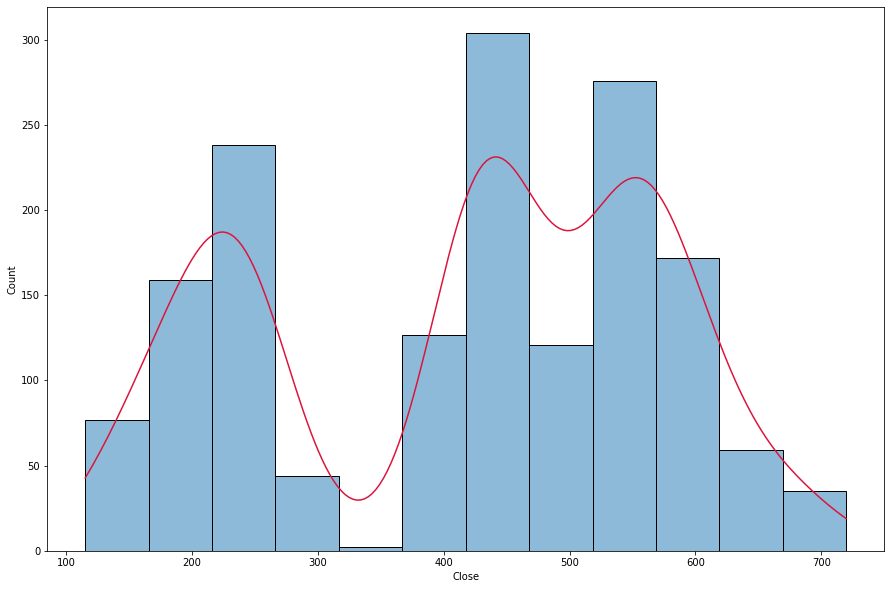

In [311]:
figsize=(3,3)
ax= sns.histplot(VWS_df['Close'], kde=True);
ax.lines[0].set_color('crimson')

In [312]:
VWS_df.to_csv("VWS_df.csv")

In [313]:
VWS_df= pd.read_csv('VWS_df.csv')#We decided works with a CSV for modeling 
VWS_df.head()

Date       Close
0  2016-01-04  475.468903
1  2016-01-05  475.200012
2  2016-01-06  468.399994
3  2016-01-07  460.307312
4  2016-01-08  458.308014

In [314]:
VWS_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1614 entries, 0 to 1613
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1614 non-null   object 
 1   Close   1614 non-null   float64
dtypes: float64(1), object(1)
memory usage: 25.3+ KB


In [315]:
#convert  the Date data to datatime Type
VWS_df["Date"] = pd.to_datetime(VWS_df.Date, format="%Y/%m/%d")
VWS_df.head()

Date       Close
0 2016-01-04  475.468903
1 2016-01-05  475.200012
2 2016-01-06  468.399994
3 2016-01-07  460.307312
4 2016-01-08  458.308014

In [316]:
VWS_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1614 entries, 0 to 1613
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1614 non-null   datetime64[ns]
 1   Close   1614 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 25.3 KB


In [317]:
VWS_df = VWS_df.rename(columns={'Close': 'VWS'})
Stocks_df = VWS_df

In [318]:
Stocks_df

Date         VWS
0    2016-01-04  475.468903
1    2016-01-05  475.200012
2    2016-01-06  468.399994
3    2016-01-07  460.307312
4    2016-01-08  458.308014
...         ...         ...
1609 2022-05-16  149.149994
1610 2022-05-17  151.960007
1611 2022-05-18  155.850006
1612 2022-05-19  157.080002
1613 2022-05-20  156.399994

[1614 rows x 2 columns]

In [319]:
Stocks_df["EDPR"] = EDPR_df["Close"]

In [320]:
Stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1614 entries, 0 to 1613
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1614 non-null   datetime64[ns]
 1   VWS     1614 non-null   float64       
 2   EDPR    1614 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 38.0 KB


In [321]:
Stocks_df

Date         VWS       EDPR
0    2016-01-04  475.468903   7.135100
1    2016-01-05  475.200012   7.300600
2    2016-01-06  468.399994   7.215130
3    2016-01-07  460.307312   7.219500
4    2016-01-08  458.308014   7.196500
...         ...         ...        ...
1609 2022-05-16  149.149994  20.480000
1610 2022-05-17  151.960007  20.754999
1611 2022-05-18  155.850006  20.639999
1612 2022-05-19  157.080002  21.545000
1613 2022-05-20  156.399994  21.805000

[1614 rows x 3 columns]

In [322]:
Stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1614 entries, 0 to 1613
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1614 non-null   datetime64[ns]
 1   VWS     1614 non-null   float64       
 2   EDPR    1614 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 38.0 KB


In [323]:
Stocks_df.tail()

Date         VWS       EDPR
1609 2022-05-16  149.149994  20.480000
1610 2022-05-17  151.960007  20.754999
1611 2022-05-18  155.850006  20.639999
1612 2022-05-19  157.080002  21.545000
1613 2022-05-20  156.399994  21.805000

In [324]:
import plotly.express as px
graphic = px.line(title = 'Stock price history')
for i in Stocks_df.columns[1:]:
  graphic.add_scatter(x = Stocks_df['Date'], y = Stocks_df[i], name = i)
graphic.show()

In [325]:
#Splinting into X/y
X = Stocks_df.drop('Date', axis=1)
y= Stocks_df['Date']
Stocks_normalized = X
Stocks_normalized.head()

VWS     EDPR
0  475.468903  7.13510
1  475.200012  7.30060
2  468.399994  7.21513
3  460.307312  7.21950
4  458.308014  7.19650

In [326]:
#scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(Stocks_normalized)
Stocks = scaler.transform(Stocks_normalized)
DF= pd.DataFrame(Stocks)
DF.rename(columns= {0: 'EDPR', 1: 'VWS'}, inplace=True)
X = DF
X['Date'] = y
X.set_index(X.columns[-1], inplace=True)
X.reset_index(inplace=True)
Stock_norm = X

In [327]:
Stock_norm.head()

Date      EDPR       VWS
0 2016-01-04  0.595938  0.073343
1 2016-01-05  0.595493  0.081516
2 2016-01-06  0.584243  0.077295
3 2016-01-07  0.570855  0.077511
4 2016-01-08  0.567547  0.076375

In [328]:
Stock_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1614 entries, 0 to 1613
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1614 non-null   datetime64[ns]
 1   EDPR    1614 non-null   float64       
 2   VWS     1614 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 38.0 KB


In [329]:
#Visualizing the graphic with the normalized data

graphic_norm = px.line(title = 'Stock price history')
for i in Stock_norm.columns[1:]:
  graphic_norm.add_scatter(x = Stock_norm['Date'], y = Stock_norm[i], name = i)
graphic_norm.show()

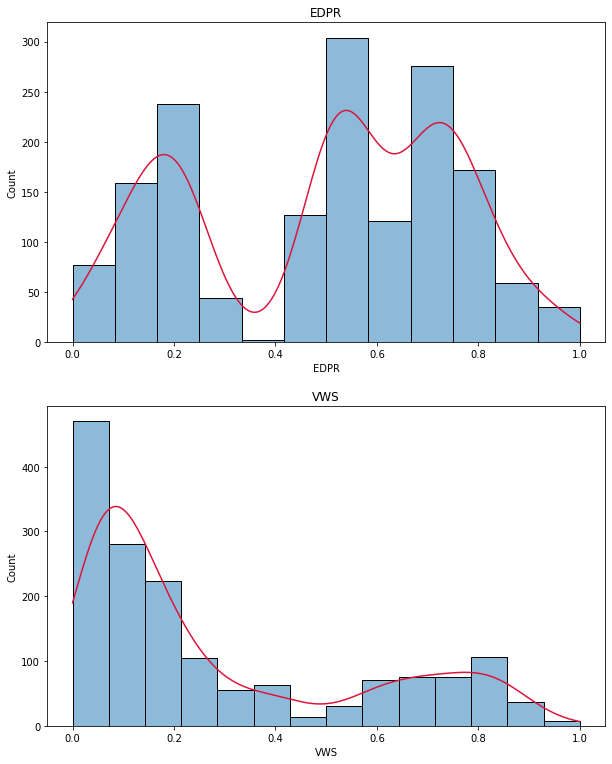

In [330]:
import numpy as np
plt.figure(figsize=(10,20))
i = 1
for i in np.arange(1, len(Stock_norm.columns)):
    plt.subplot(3, 1, i + 1)
    ax=sns.histplot(Stock_norm[Stock_norm.columns[i]], kde = True)
    ax.lines[0].set_color('crimson')
    plt.title(Stock_norm.columns[i])

### II.1- ETS-Decomposition


ETS-Decomposition is a method that allows us to visualize the data after a decomposition of time series into three distinct components: trend, seasonality, and noise.

* Additive decomposition: yt = St + Tt + Rt
* Multiplicative decomposition: yt = St * Tt * Rt

where, 
- S represents the Seasonal variation
- T encodes Trend plus Cycle
- R describes the Residual or the Error component.
Daitan (2019)

In [331]:
# graphs to show seasonal_decompose
def ETS_Decomposition (timeseries):
    decomposition = sm.tsa.seasonal_decompose(timeseries, model='mul',freq=30)
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()

#### A.- EDP Renováveis (0ML1.IL)

In [332]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
EDPR= pd.read_csv('EDPR.csv',index_col='Date',parse_dates=['Date'],date_parser=dateparse, dayfirst=True)
EDPR.head(2)

High     Low    Open   Close  Volume  Adj Close
Date                                                         
2016-01-04  7.1351  7.1351  7.1351  7.1351     0.0   6.866567
2016-01-05  7.3006  7.3006  7.3006  7.3006   150.0   7.025838

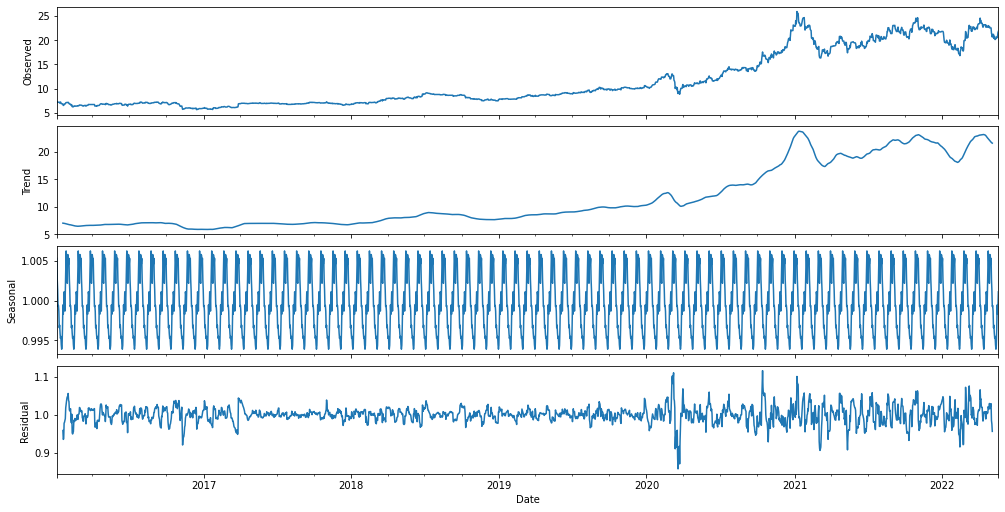

In [333]:
Plo.ETS_Decomposition(EDPR['Close'])

#### B.- Vestas Wind Systems A/S (0NMK.IL)

In [334]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
VWS= pd.read_csv('VWS.csv',index_col='Date', parse_dates=['Date'],date_parser=dateparse, dayfirst=True)
VWS.head(2)

High         Low        Open       Close  Volume   Adj Close
Date                                                                          
2016-01-04  483.998474  475.468903  473.500000  475.468903  2528.0  464.095367
2016-01-05  476.799988  465.432190  479.899994  475.200012  1738.0  463.832947

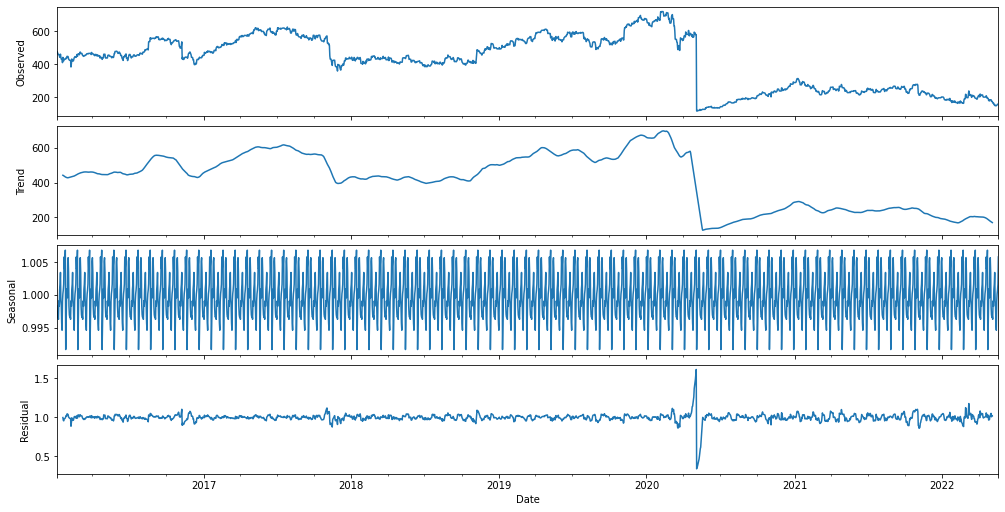

In [335]:
Plo.ETS_Decomposition (VWS['Close'])

### II.2.- Augmented Dickey–Fuller test

The Augmented Dickey-Fuller test helps us to detect if a time series is or not “stationary”. Stationary means that the data has no trend, exhibits constant variance over time, and has a constant autocorrelation structure over time. It is ‘stationarize’ the time series as part of the process of fitting a model.Zach (2021) 

In [336]:
def ADFuller(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {} - The data is {} stationary with {}% confidence'.format(key, value, 'not' if value < result[0] else '', 100-int(key[:-1])))
        

#### A.- EDP Renováveis (0ML1.IL)

In [337]:
ADFuller(EDPR['Close'])

ADF Statistic: -0.456587
p-value: 0.900214
Critical Values:
	1%: -3.433180338127563 - The data is not stationary with 99% confidence
	5%: -2.862790383920141 - The data is not stationary with 95% confidence
	10%: -2.5674356352962047 - The data is not stationary with 90% confidence


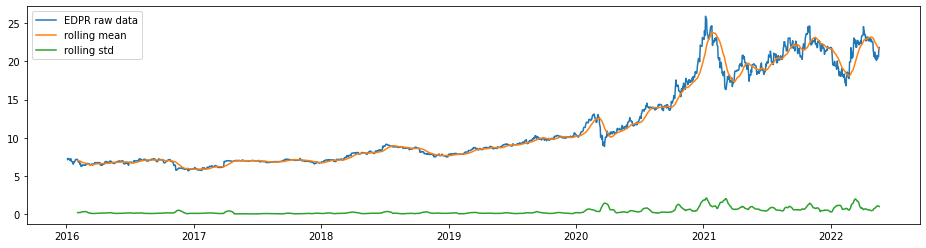

In [338]:
Plo.plot_stationarity(EDPR['Close'],'EDPR raw data')

#### B.- Vestas Wind Systems A/S (0NMK.IL)

In [339]:
ADFuller(VWS['Close'])

ADF Statistic: -1.581803
p-value: 0.492728
Critical Values:
	1%: -3.433162081244742 - The data is not stationary with 99% confidence
	5%: -2.8627823222150104 - The data is not stationary with 95% confidence
	10%: -2.567431343047732 - The data is not stationary with 90% confidence


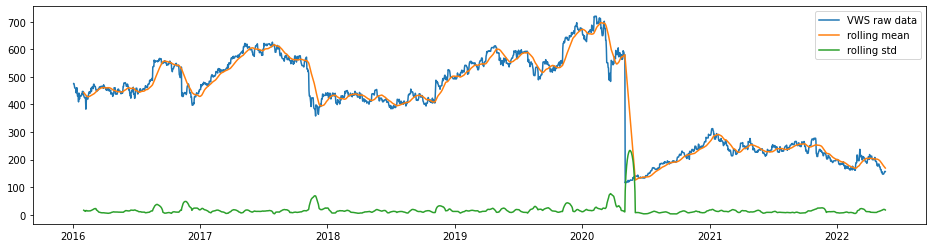

In [340]:
Plo.plot_stationarity(VWS['Close'],'VWS raw data')

### II.3.- Make the Data Stationary

### II.3.1.- Detrending: 

- Removing the underlying trend in the time series.

#### A.- EDP Renováveis (0ML1.IL)

ADF Statistic: -11.052880
p-value: 0.000000
Critical Values:
	1%: -3.433197593068361 - The data is  stationary with 99% confidence
	5%: -2.862798003151751 - The data is  stationary with 95% confidence
	10%: -2.5674396919684996 - The data is  stationary with 90% confidence


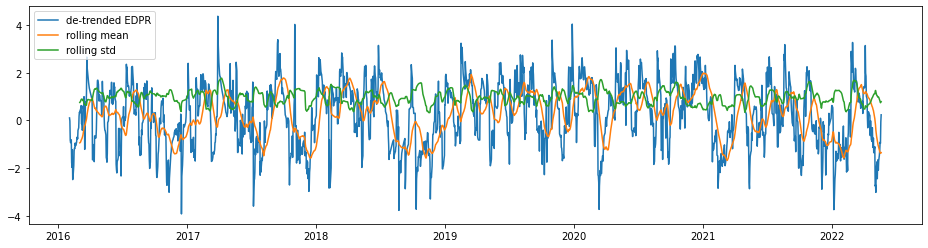

In [341]:
EDPR['Detrend']=  (EDPR['Close'] - EDPR['Close'].rolling(30).mean())/EDPR['Close'].rolling(30).std().dropna()
Plo.plot_stationarity(EDPR['Detrend'],'de-trended EDPR')
ADFuller(EDPR['Detrend'].dropna(inplace=False))

#### B.- Vestas Wind Systems A/S (0NMK.IL)

ADF Statistic: -10.228205
p-value: 0.000000
Critical Values:
	1%: -3.4331988336181656 - The data is  stationary with 99% confidence
	5%: -2.8627985509372906 - The data is  stationary with 95% confidence
	10%: -2.567439983623706 - The data is  stationary with 90% confidence


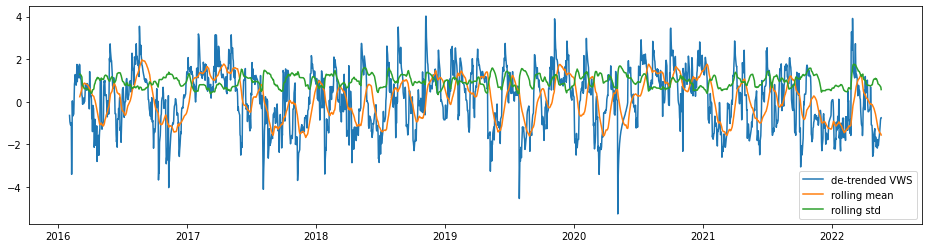

In [342]:
VWS['Detrend'] =  (VWS['Close'] - VWS['Close'].rolling(30).mean())/VWS['Close'].rolling(30).std().dropna()
Plo.plot_stationarity(VWS['Detrend'],'de-trended VWS')
ADFuller(VWS['Detrend'].dropna(inplace=False))

### II.3.2.-  Differencing

#### A.- EDP Renováveis (0ML1.IL)

- Removing the underlying seasonal or cyclical patterns in the time series. 

In [343]:
EDPR['Differencing']=  EDPR['Close'] - EDPR['Close'].shift(1).dropna()

ADF Statistic: -11.168137
p-value: 0.000000
Critical Values:
	1%: -3.433180338127563 - The data is  stationary with 99% confidence
	5%: -2.862790383920141 - The data is  stationary with 95% confidence
	10%: -2.5674356352962047 - The data is  stationary with 90% confidence


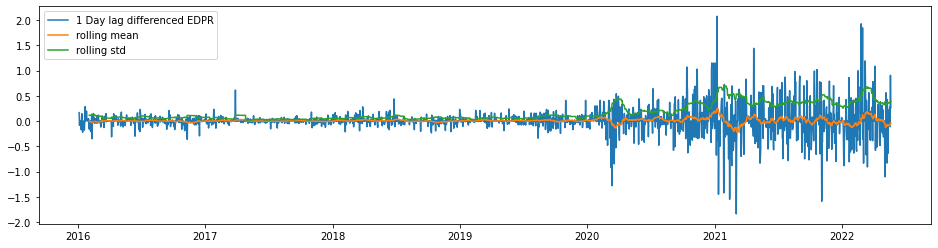

In [344]:
Plo.plot_stationarity(EDPR['Differencing'], '1 Day lag differenced EDPR')
ADFuller(EDPR['Differencing'].dropna(inplace=False))

#### B.- Vestas Wind Systems A/S (0NMK.IL)

ADF Statistic: -48.476727
p-value: 0.000000
Critical Values:
	1%: -3.4331632910395253 - The data is  stationary with 99% confidence
	5%: -2.8627828564265023 - The data is  stationary with 95% confidence
	10%: -2.567431627474709 - The data is  stationary with 90% confidence


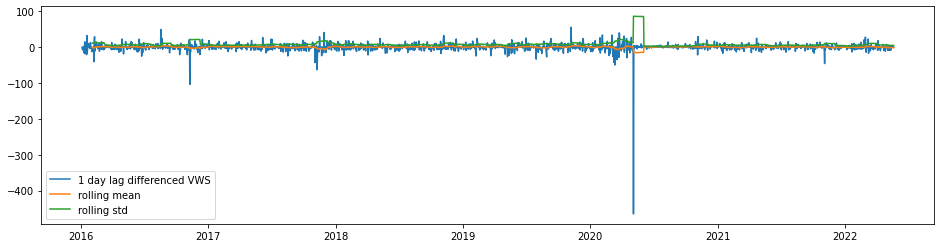

In [345]:
VWS['Differencing'] =  VWS['Close'] - VWS['Close'].shift(1).dropna()

Plo.plot_stationarity(VWS['Differencing'], '1 day lag differenced VWS')
ADFuller(VWS['Differencing'].dropna(inplace=False))

### II.3.3.-  Detrending + Differencing

- Removing the underlying trend and the seasonal or cyclical patterns in the time series.

#### A.- EDP Renováveis (0ML1.IL)

ADF Statistic: -15.662700
p-value: 0.000000
Critical Values:
	1%: -3.4332175724250398 - The data is  stationary with 99% confidence
	5%: -2.8628068253436054 - The data is  stationary with 95% confidence
	10%: -2.567444389136486 - The data is  stationary with 90% confidence


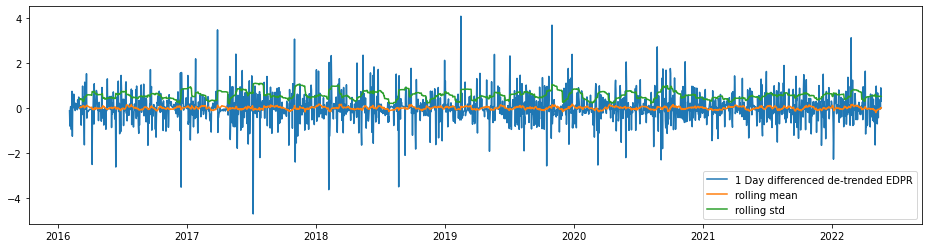

In [346]:
EDPR['Detrend_Diff']=  EDPR['Detrend']- EDPR['Detrend'].shift(1).dropna()
Plo.plot_stationarity(EDPR['Detrend_Diff'],'1 Day differenced de-trended EDPR')
ADFuller(EDPR['Detrend_Diff'].dropna(inplace=False))

#### B.- Vestas Wind Systems A/S (0NMK.IL)

ADF Statistic: -17.391759
p-value: 0.000000
Critical Values:
	1%: -3.4332125513481744 - The data is  stationary with 99% confidence
	5%: -2.86280460821553 - The data is  stationary with 95% confidence
	10%: -2.5674432086780112 - The data is  stationary with 90% confidence


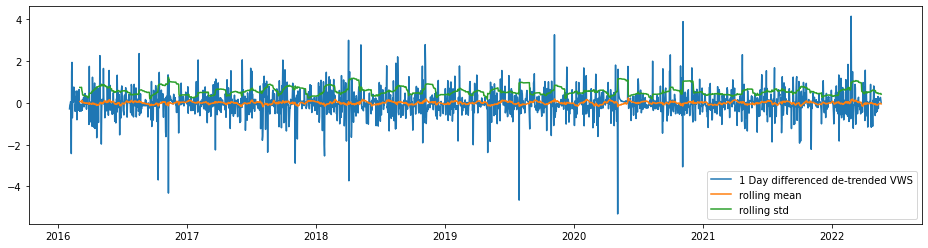

In [347]:
VWS['Detrend_Diff'] =  VWS['Detrend']- VWS['Detrend'].shift(1)

Plo.plot_stationarity(VWS['Detrend_Diff'],'1 Day differenced de-trended VWS')
ADFuller(VWS['Detrend_Diff'].dropna(inplace=False))

### II.4- Identifying AR and MA orders by ACF and PACF plots

Plotting  ACF and PACF help us to undertand how to choose the best MA(q) and AR(p) values:

- ACF= Describes how well the present value of the series is related with its past values 
- PACF= It finds correlation of the residuals

Blue bars on the plots are the error bands, everything in this area is not statistically significant.  In linear regression models performs best when the predictors are not correlated and are independent of each other. 



A Q-Q plot is a scatterplot created by plotting two sets of quantiles against one another. If both sets of quantiles came from the same distribution, we should see the points forming a line that’s roughly straight.

In [348]:
# Q-Q plot of the quantiles of x versus the quantiles/ppf of a distribution.
def plot_QQ(timeseries):
    x = sm.qqplot(timeseries, line= 's')

#### A.- EDP Renováveis (0ML1.IL)

ADF Statistic: -15.662700
p-value: 0.000000
Critical Values:
	1%: -3.4332175724250398 - The data is  stationary with 99% confidence
	5%: -2.8628068253436054 - The data is  stationary with 95% confidence
	10%: -2.567444389136486 - The data is  stationary with 90% confidence


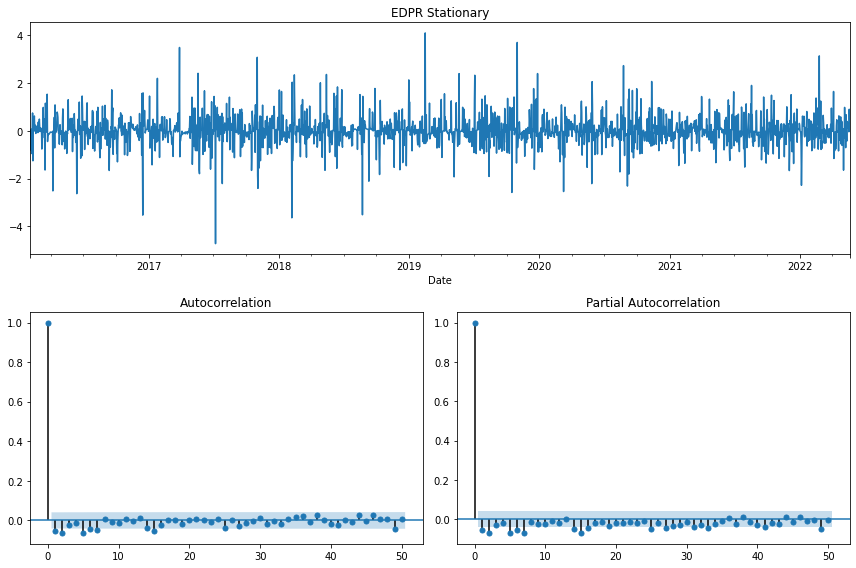

In [349]:
# Drop the first row of 'Close' column because It has 'NaN' value
ADFuller(EDPR['Detrend_Diff'].dropna(inplace=False))
Plo.plot_ACF_PACF(EDPR['Detrend_Diff'].dropna(inplace=False) , 'EDPR Stationary')

It looks like the ACF is lagged by 7 and that PACF is geometric. If both ACF and PACF plots demonstrate a gradual decreasing pattern, then the ARMA process should be considered for modelling.

<a href="https://towardsdatascience.com/identifying-ar-and-ma-terms-using-acf-and-pacf-plots-in-time-series-forecasting-ccb9fd073db8">Masum, M. (2020) </a>


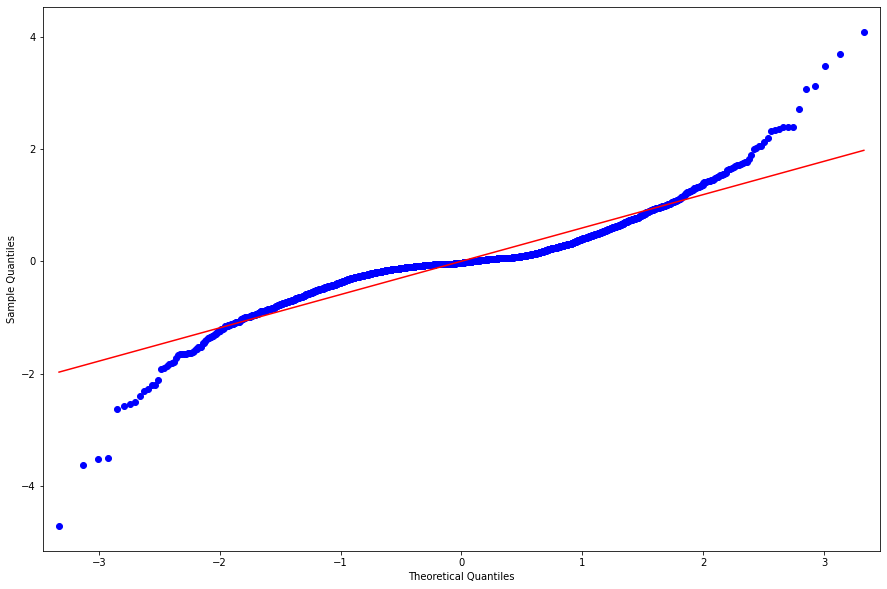

In [350]:
plot_QQ(EDPR['Detrend_Diff'].dropna())

#### B.- Vestas Wind Systems A/S (0NMK.IL)

ADF Statistic: -15.662700
p-value: 0.000000
Critical Values:
	1%: -3.4332175724250398 - The data is  stationary with 99% confidence
	5%: -2.8628068253436054 - The data is  stationary with 95% confidence
	10%: -2.567444389136486 - The data is  stationary with 90% confidence


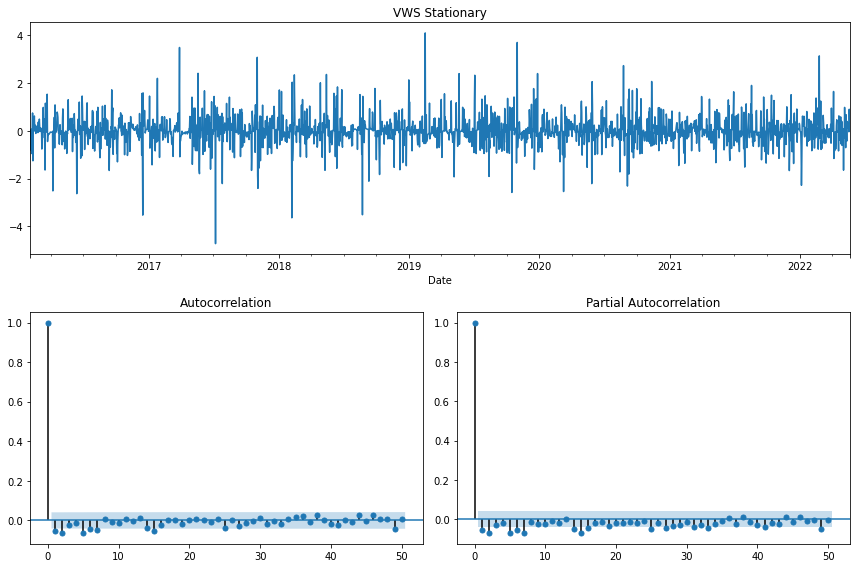

In [351]:
# Drop the first row of 'Close' column because It has 'NaN' value
ADFuller(EDPR['Detrend_Diff'].dropna(inplace=False))
Plo.plot_ACF_PACF(EDPR['Detrend_Diff'].dropna(inplace=False) , 'VWS Stationary')

It looks like the ACF is lagged by 3 and that PACF is geometric. If both ACF and PACF plots demonstrate a gradual decreasing pattern, then the ARMA process should be considered for modelling. 
<a href="https://towardsdatascience.com/identifying-ar-and-ma-terms-using-acf-and-pacf-plots-in-time-series-forecasting-ccb9fd073db8">Masum, M. (2020) </a>


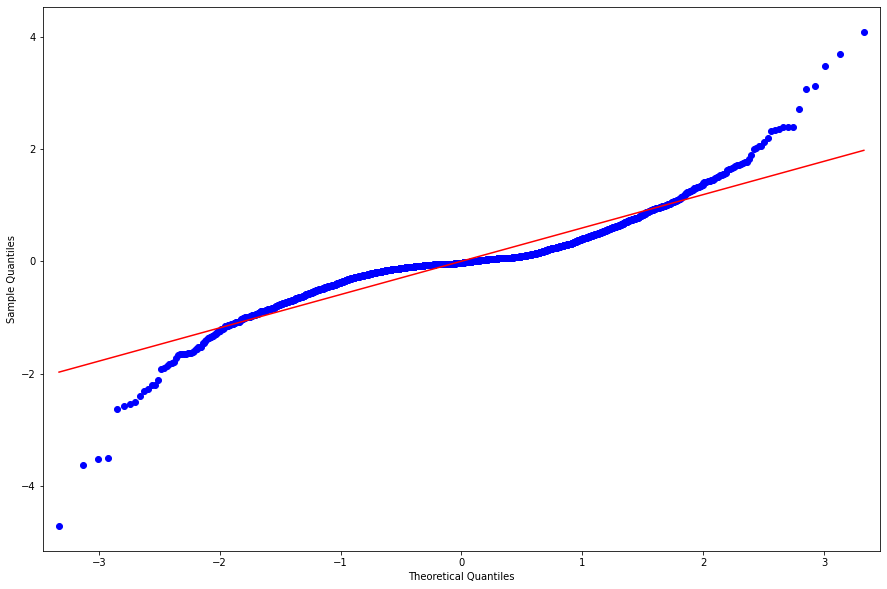

In [352]:
plot_QQ(EDPR['Detrend_Diff'].dropna(inplace=False))

### III.-Modelling

#### A.- EDP Renováveis (0ML1.IL)

In [353]:
# Divide into train and validation set to calculate R-squared score and mean absolute percentage error 
train_A = EDPR[:int(0.85 * (len(EDPR)))]
test_A  = EDPR[int(0.85 * (len(EDPR))):]
train_A.shape, test_A.shape

((1979, 9), (350, 9))

#### B.- Vestas Wind Systems A/S (0NMK.IL)

In [354]:
# Divide into train and validation set to calculate R-squared score and mean absolute percentage error 
train_B = VWS[:int(0.85 * (len(VWS)))]
test_B  = VWS[int(0.85 * (len(VWS))):]

train_B.shape, test_B.shape

((1979, 9), (350, 9))

### III.1.- Moving Averages (MA)

-Process where the present value of series is defined as a linear combination of past errors.


In [355]:
w= 20

#### A.- EDP Renováveis (0ML1.IL)

In [356]:
#create moving average by applying a mean function to a rolling window.
EDPR['MA-RW'] = EDPR['Close'].rolling(window=w).mean()
#EDPR.head()

In [357]:
#create moving average by applying a mean function to a ewm (Exponentially Weighted Moving Average)
EDPR['MA_EWM'] = EDPR['Close'].ewm(span=w,adjust=False).mean()
#EDPR.head()

In [358]:
#create moving average by applying Simple Exponential Smoothing from statmodels Holt-Winters
warnings.filterwarnings('ignore') 
span = w
alpha = 2/(span+1)
EDPR['MA_SES']=SimpleExpSmoothing(EDPR['Close']).fit(smoothing_level=alpha,optimized=False).fittedvalues


##### Validating the Forecast Simple Exponential Smoothing 

In [359]:
start = len(train_A)
end   = len(train_A) + len(test_A) - 1


#First fold RMSE
model1 = SimpleExpSmoothing(train_A['Close']).fit(smoothing_level=alpha,optimized=False)
pred1 = model1.predict(start=start , end=end)

In [360]:
# Create a dataframe to store r2 score
MA_SES_EDPR = pd.DataFrame({'r2_score': r2_score(test_A['Close'], pred1)}, index = [0])

# Add columns in the dataframe 'evaluation_results'
MA_SES_EDPR['Model'] = 'MA_SES'
MA_SES_EDPR.set_index(['Model'], inplace=True)
MA_SES_EDPR['mean_absolute_error'] = mean_absolute_error(test_A['Close'], pred1)
MA_SES_EDPR['mean_squared_error'] = mean_squared_error(test_A['Close'], pred1)
MA_SES_EDPR['root_mean_squared_error'] = np.sqrt(mean_squared_error(test_A['Close'], pred1))
MA_SES_EDPR['mean_absolute_percentage_error'] = np.mean(np.abs(pred1 - test_A['Close'])
                                                               /np.abs(test_A['Close']))*100 
# Display the results
MA_SES_EDPR

r2_score  mean_absolute_error  mean_squared_error  \
Model                                                       
MA_SES -1.544235             2.266378            6.837497   

        root_mean_squared_error  mean_absolute_percentage_error  
Model                                                            
MA_SES                 2.614861                       10.340887

In [361]:
#create moving average by applying Double Exponential Smoothing from statmodels Holt-Winters
EDPR['MA_Holt-Winters'] = ExponentialSmoothing(EDPR['Close'], trend='add').fit().fittedvalues

##### Validating the Forecast Double Exponential Smoothing

In [362]:
start = len(train_A)
end   = len(train_A) + len(test_A) - 1


#First fold RMSE
model1 = ExponentialSmoothing(train_A['Close'], trend='add').fit()
pred1 = model1.predict(start=start , end=end)

In [363]:
# Create a dataframe to store r2 score
MA_HoltWinters_EDPR = pd.DataFrame({'r2_score': r2_score(test_A['Close'], pred1)}, index = [0])

# Add columns in the dataframe 'evaluation_results'
MA_HoltWinters_EDPR['Model'] = 'MA_Holt-Winters'
MA_HoltWinters_EDPR.set_index(['Model'], inplace=True)
MA_HoltWinters_EDPR['mean_absolute_error'] = mean_absolute_error(test_A['Close'], pred1)
MA_HoltWinters_EDPR['mean_squared_error'] = mean_squared_error(test_A['Close'], pred1)
MA_HoltWinters_EDPR['root_mean_squared_error'] = np.sqrt(mean_squared_error(test_A['Close'], pred1))
MA_HoltWinters_EDPR['mean_absolute_percentage_error'] = np.mean(np.abs(pred1 - test_A['Close'])
                                                               /np.abs(test_A['Close']))*100 
# Display the results
MA_HoltWinters_EDPR

r2_score  mean_absolute_error  mean_squared_error  \
Model                                                                
MA_Holt-Winters -0.904174             1.970772            5.117367   

                 root_mean_squared_error  mean_absolute_percentage_error  
Model                                                                     
MA_Holt-Winters                  2.26216                        9.089744

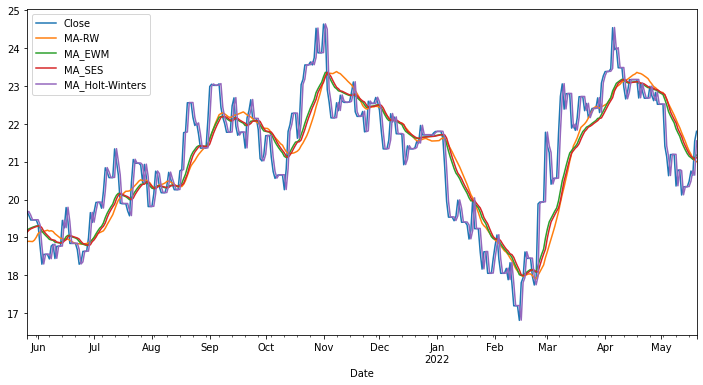

In [364]:
#Plotting the accuracy of the MA
EDPR[['Close','MA-RW','MA_EWM','MA_SES','MA_Holt-Winters']].iloc[-360:].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

#### B.- Vestas Wind Systems A/S (0NMK.IL)

In [365]:
#create moving average by applying a mean function to a rolling window.
VWS['MA-RW'] = VWS['Close'].rolling(window=w).mean()
#VWS.head()

In [366]:
#create moving average by applying a mean function to a ewm (Exponentially Weighted Moving Average)
VWS['MA_EWM'] = VWS['Close'].ewm(span=w,adjust=False).mean()
#VWS.head()

In [367]:
warnings.filterwarnings('ignore') 
#create moving average by applying Simple Exponential Smoothing from statmodels Holt-Winters
span = w
alpha = 2/(span+1)
VWS.asfreq(freq='b')
VWS['MA_SES']=SimpleExpSmoothing(VWS['Close']).fit(smoothing_level=alpha,optimized=False).fittedvalues

##### Validating the Forecast Simple Exponential Smoothing

In [368]:
start = len(train_B)
end   = len(train_B) + len(test_B) - 1

model2 = SimpleExpSmoothing(train_B['Close']).fit(smoothing_level=alpha,optimized=False)
pred2 = model2.predict(start=start , end=end)

In [369]:
# Create a dataframe to store r2 score
MA_SES_VWS = pd.DataFrame({'r2_score': r2_score(test_B['Close'], pred2)}, index = [0])

# Add columns in the dataframe 'evaluation_results'
MA_SES_VWS['Model'] = 'MA_SES'
MA_SES_VWS.set_index(['Model'], inplace=True)
MA_SES_VWS['mean_absolute_error'] = mean_absolute_error(test_B['Close'], pred2)
MA_SES_VWS['mean_squared_error'] = mean_squared_error(test_B['Close'], pred2)
MA_SES_VWS['root_mean_squared_error'] = np.sqrt(mean_squared_error(test_B['Close'], pred2))
MA_SES_VWS['mean_absolute_percentage_error'] = np.mean(np.abs(pred2 - test_B['Close'])
                                                               /np.abs(test_B['Close']))*100 
# Display the results
MA_SES_VWS

r2_score  mean_absolute_error  mean_squared_error  \
Model                                                       
MA_SES -0.314209            29.832657         1353.002663   

        root_mean_squared_error  mean_absolute_percentage_error  
Model                                                            
MA_SES                36.783185                        15.48682

In [370]:
#create moving average by applying Double Exponential Smoothing from statmodels Holt-Winters
VWS['MA_Holt-Winters'] = ExponentialSmoothing(VWS['Close'], trend='add').fit().fittedvalues

##### Validating the Forecast Double Exponential Smoothing

In [371]:
start = len(train_B)
end   = len(train_B) + len(test_B) - 1

model2 = ExponentialSmoothing(train_B['Close'], seasonal='mul',trend='add', seasonal_periods=12).fit()
pred2 = model2.predict(start=start , end=end)

In [372]:
# Create a dataframe to store r2 score
MA_HoltWinters_VWS = pd.DataFrame({'r2_score': r2_score(test_B['Close'], pred2)}, index = [0])

# Add columns in the dataframe 'evaluation_results'
MA_HoltWinters_VWS['Model'] = 'MA_Holt-Winters'
MA_HoltWinters_VWS.set_index(['Model'], inplace=True)
MA_HoltWinters_VWS['mean_absolute_error'] = mean_absolute_error(test_B['Close'], pred2)
MA_HoltWinters_VWS['mean_squared_error'] = mean_squared_error(test_B['Close'], pred2)
MA_HoltWinters_VWS['root_mean_squared_error'] = np.sqrt(mean_squared_error(test_B['Close'], pred2))
MA_HoltWinters_VWS['mean_absolute_percentage_error'] = np.mean(np.abs(pred2 - test_B['Close'])
                                                               /np.abs(test_B['Close']))*100 
# Display the results
MA_HoltWinters_VWS

r2_score  mean_absolute_error  mean_squared_error  \
Model                                                                
MA_Holt-Winters -0.077997             27.77324         1109.817661   

                 root_mean_squared_error  mean_absolute_percentage_error  
Model                                                                     
MA_Holt-Winters                33.313926                       14.007413

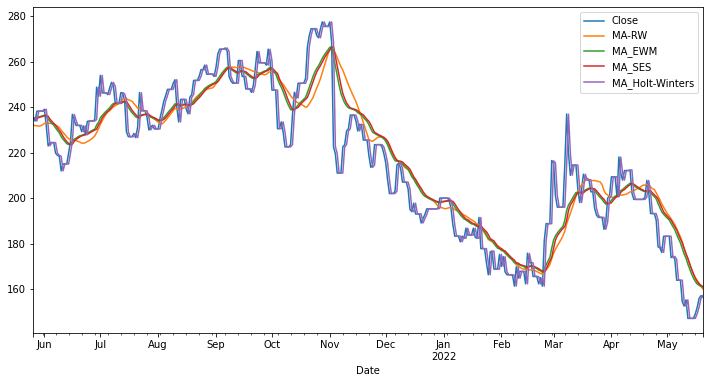

In [373]:
#Plotting the accuracy of the MA
VWS[['Close','MA-RW','MA_EWM','MA_SES','MA_Holt-Winters']].iloc[-360:].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

### III.2.- ARMA

#### A.- EDP Renováveis (0ML1.IL)

In [374]:
# Divide into train and validation set to calculate R-squared score and mean absolute percentage error 
n=int(len(EDPR)* 0.9)#90% of the dataset
train_A = EDPR.Close[:n]
test_A  = EDPR.Close[n:]
train_A.shape, test_A.shape

((2096,), (233,))

In [375]:
base_EDPR = smtsa.ARMA(train_A, order=(1, 0)).fit(maxlag=20, method='mle', trend='nc', disp=0) 
base_EDPR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2096
Model:                     ARMA(1, 0)   Log Likelihood                 404.252
Method:                           mle   S.D. of innovations              0.199
Date:                Sun, 22 May 2022   AIC                           -804.504
Time:                        17:20:01   BIC                           -793.209
Sample:                    01-04-2016   HQIC                          -800.367
                         - 09-29-2021                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
ar.L1.Close     0.9999      0.000   8548.712      0.000       1.000       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

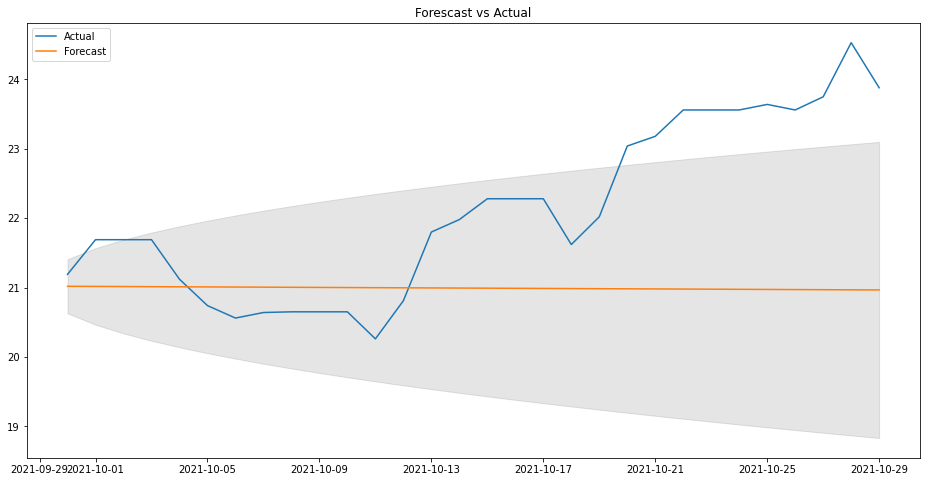

In [376]:
step= 30
#forecasting
fc, se, conf = base_EDPR.forecast(step)
fc = pd.Series(fc, index=test_A[:step].index)
lower= pd.Series(conf[:,0],index=test_A[:step].index)
upper= pd.Series(conf[:,1],index=test_A[:step].index)
#plotting
plt.figure(figsize=(16,8))
plt.plot(test_A[:step], label='Actual')
plt.plot(fc, label='Forecast')
plt.fill_between(lower.index, lower, upper, color='k', alpha=0.1)
plt.title('Forescast vs Actual')
plt.legend(loc= 'upper left')

##### Validating the Forecast

In [377]:
start = len(train_A)
end   = len(train_A) + len(test_A) - 1
predictions = base_EDPR.predict(start = start, end = end, dynamic = False)

# Create a dataframe to store r2 score
R_arma_EDPR = pd.DataFrame({'r2_score': r2_score(test_A, predictions)}, index = [0])

# Add columns in the dataframe 'evaluation_results'
R_arma_EDPR['Model'] = 'ARMA'
R_arma_EDPR.set_index(['Model'], inplace=True)
R_arma_EDPR['mean_absolute_error'] = mean_absolute_error(test_A, predictions)
R_arma_EDPR['mean_squared_error'] = mean_squared_error(test_A, predictions)
R_arma_EDPR['root_mean_squared_error'] = np.sqrt(mean_squared_error(test_A, predictions))
R_arma_EDPR['mean_absolute_percentage_error'] = np.mean(np.abs(predictions - test_A)
                                                               /np.abs(test_A))*100 
# Display the results
R_arma_EDPR

r2_score  mean_absolute_error  mean_squared_error  \
Model                                                      
ARMA  -0.102873             1.569026            3.309967   

       root_mean_squared_error  mean_absolute_percentage_error  
Model                                                           
ARMA                  1.819331                        7.404001

#### B.- Vestas Wind Systems A/S (0NMK.IL)

In [378]:
# Divide into train and validation set to calculate R-squared score and mean absolute percentage error 
n=int(len(VWS)* 0.9)
train_B = VWS.Close[:n]
test_B  = VWS.Close[n:]
train_B.shape, test_B.shape

((2096,), (233,))

In [379]:
base_VWS = smtsa.ARMA(train_B, order=(0, 1)).fit(method='mle', trend='c',disp=0) 
base_VWS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2096
Model:                     ARMA(0, 1)   Log Likelihood              -12076.204
Method:                           mle   S.D. of innovations             76.867
Date:                Sun, 22 May 2022   AIC                          24158.409
Time:                        17:20:02   BIC                          24175.352
Sample:                    01-04-2016   HQIC                         24164.615
                         - 09-29-2021                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         440.2856      3.264    134.881      0.000     433.888     446.683
ma.L1.Close     0.9446      0.005    181.626      0.000       0.934       0.955
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.0586           +0.0000j            1.0586            0.5000
-----------------------------------------------------------------------------
"""

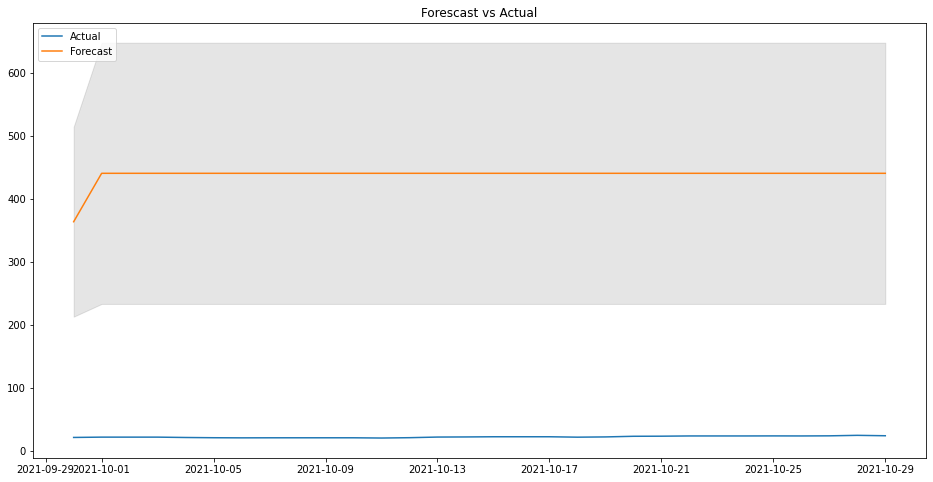

In [380]:
step= 30
fc, se, conf = base_VWS.forecast(step)

fc = pd.Series(fc, index=test_B[:step].index)
lower= pd.Series(conf[:,0],index=test_B[:step].index)
upper= pd.Series(conf[:,1],index=test_B[:step].index)

plt.figure(figsize=(16,8))
plt.plot(test_A[:step], label='Actual')
plt.plot(fc, label='Forecast')
plt.fill_between(lower.index, lower, upper, color='k', alpha=0.1)
plt.title('Forescast vs Actual')
plt.legend(loc= 'upper left')

##### Validating the Forecast

In [381]:
start = len(train_B)
end   = len(train_B) + len(test_B) - 1
predictions = base_VWS.predict(start = start, end = end, dynamic = False)

In [382]:
# Create a dataframe to store r2 score
R_arma_VWS = pd.DataFrame({'r2_score': r2_score(test_B, predictions)}, index = [0])

# Add columns in the dataframe 'evaluation_results'
R_arma_VWS['Model'] = 'ARMA'
R_arma_VWS.set_index(['Model'], inplace=True)
R_arma_VWS['mean_absolute_error'] = mean_absolute_error(test_B, predictions)
R_arma_VWS['mean_squared_error'] = mean_squared_error(test_B, predictions)
R_arma_VWS['root_mean_squared_error'] = np.sqrt(mean_squared_error(test_B, predictions))
R_arma_VWS['mean_absolute_percentage_error'] = np.mean(np.abs(predictions - test_B)
                                                               /np.abs(test_B))*100 
# Display the results
R_arma_VWS

r2_score  mean_absolute_error  mean_squared_error  \
Model                                                       
ARMA  -62.965208           237.875877        57548.373599   

       root_mean_squared_error  mean_absolute_percentage_error  
Model                                                           
ARMA                239.892421                      122.418316

### III.3.- ARIMA

#### A.- EDP Renováveis (0ML1.IL)

In [383]:
# Divide into train and validation set to calculate R-squared score and mean absolute percentage error 
n=int(len(EDPR)* 0.9)#90% of the dtaset

In [384]:
train_A = list(EDPR[:n]['Close'])
test_A  = list(EDPR[n:]['Close'])
model_pred=[]
n_test_Obs =len(test_A)

In [385]:
for i in range(n_test_Obs):
    model= ARIMA(train_A, order=(0,1,1))#setting model
    model_fit=model.fit()#fitting the model
    output=model_fit.forecast()#forecasting
    yhat = list(output[0])[0]#the first day prediction
    model_pred.append(yhat)#add the prediction to the model
    actual_test=test_A[i]#itering over the test dataset
    train_A.append(actual_test)#pass the historial data to the training set

In [386]:
len(model_pred)


233

In [387]:
len(test_A)

233

In [388]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 2327
Model:                 ARIMA(0, 1, 1)   Log Likelihood                  97.698
Method:                       css-mle   S.D. of innovations              0.232
Date:                Sun, 22 May 2022   AIC                           -189.396
Time:                        17:20:10   BIC                           -172.139
Sample:                             1   HQIC                          -183.108
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0062      0.005      1.227      0.220      -0.004       0.016
ma.L1.D.y      0.0534      0.022      2.481      0.013       0.011       0.096
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1          -18.7293           +0.0000j           18.7293            0.5000
-----------------------------------------------------------------------------
"""

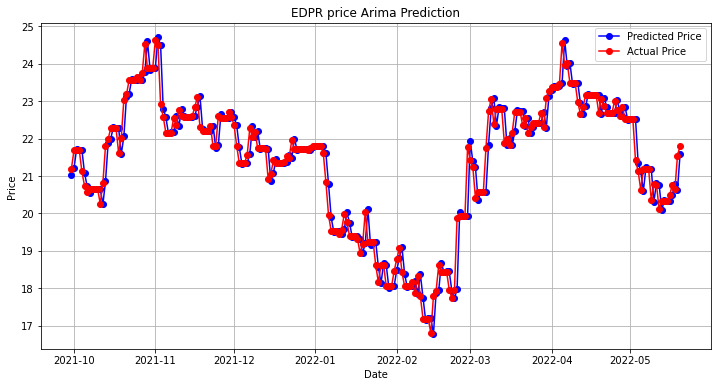

In [389]:
plt.figure(figsize=(12,6))
plt.grid(True)
date_range= EDPR[n:].index
plt.plot(date_range,model_pred,color= 'blue', marker= 'o', label ='Predicted Price')
plt.plot(date_range,test_A,color= 'red', marker= 'o', label ='Actual Price')
plt.title('EDPR price Arima Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


##### Validating the Forecast

In [390]:
# Create a dataframe to store r2 score
R_arima_EDPR = pd.DataFrame({'r2_score': r2_score(test_A, model_pred)}, index = [0])

# Add columns in the dataframe 'evaluation_results'
R_arima_EDPR ['Model'] = 'ARIMA'
R_arima_EDPR .set_index(['Model'], inplace=True)
R_arima_EDPR ['mean_absolute_error'] = mean_absolute_error(test_A, model_pred)
R_arima_EDPR ['mean_squared_error'] = mean_squared_error(test_A, model_pred)
R_arima_EDPR ['root_mean_squared_error'] = np.sqrt(mean_squared_error(test_A, model_pred))
R_arima_EDPR ['mean_absolute_percentage_error'] = np.mean(np.abs(np.array(model_pred) - np.array(test_A))
                                                               /np.abs(test_A))*100 
# Display the results
R_arima_EDPR 

r2_score  mean_absolute_error  mean_squared_error  \
Model                                                      
ARIMA  0.938885             0.278017             0.18342   

       root_mean_squared_error  mean_absolute_percentage_error  
Model                                                           
ARIMA                 0.428276                        1.314665

#### B.- Vestas Wind Systems A/S (0NMK.IL)

In [391]:
# Divide into train and validation set to calculate R-squared score and mean absolute percentage error 
n=int(len(VWS)* 0.9)#90% of the dtaset

In [392]:
train_B = list(VWS[:n]['Close'])
test_B  = list(VWS[n:]['Close'])
model_pred=[]
n_test_Obs =len(test_B)

In [393]:
for i in range(n_test_Obs):
    model= ARIMA(train_B, order=(1,0,1))#setting model
    model_fit=model.fit()#fitting the model
    output=model_fit.forecast()#forecasting
    yhat = list(output[0])[0]#the first day prediction
    model_pred.append(yhat)#add the prediction to the model
    actual_test=test_B[i]#itering over the test dataset
    train_B.append(actual_test)#pass the historial data to the training set 

In [394]:
len(model_pred)

233

In [395]:
len(test_B)

233

In [396]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 2328
Model:                     ARMA(1, 1)   Log Likelihood               -9166.769
Method:                       css-mle   S.D. of innovations             12.399
Date:                Sun, 22 May 2022   AIC                          18341.538
Time:                        17:21:30   BIC                          18364.549
Sample:                             0   HQIC                         18349.922
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        394.4660     75.759      5.207      0.000     245.981     542.951
ar.L1.y        0.9970      0.002    647.400      0.000       0.994       1.000
ma.L1.y       -0.0037      0.021     -0.177      0.859      -0.045       0.037
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0030           +0.0000j            1.0030            0.0000
MA.1          270.5252           +0.0000j          270.5252            0.0000
-----------------------------------------------------------------------------
"""

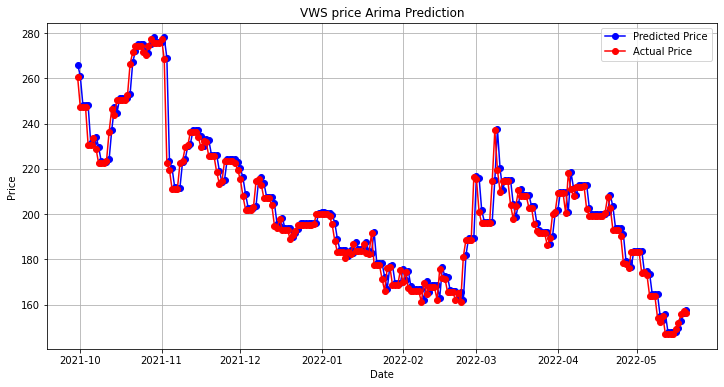

In [552]:
plt.figure(figsize=(12,6))
plt.grid(True)
date_range= VWS[n:].index
plt.plot(date_range,model_pred,color= 'blue', marker= 'o', label ='Predicted Price')
plt.plot(date_range,test_B,color= 'red', marker= 'o', label ='Actual Price')
plt.title('VWS price Arima Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


##### Validating the Forecast

In [398]:
# Create a dataframe to store r2 score
R_arima_VWS = pd.DataFrame({'r2_score': r2_score(test_B, model_pred)}, index = [0])

# Add columns in the dataframe 'evaluation_results'
R_arima_VWS['Model'] = 'ARIMA'
R_arima_VWS.set_index(['Model'], inplace=True)
R_arima_VWS['mean_absolute_error'] = mean_absolute_error(test_B, model_pred)
R_arima_VWS['mean_squared_error'] = mean_squared_error(test_B, model_pred)
R_arima_VWS['root_mean_squared_error'] = np.sqrt(mean_squared_error(test_B, model_pred))
R_arima_VWS['mean_absolute_percentage_error'] = np.mean(np.abs(np.array(model_pred) - np.array(test_A))
                                                               /np.abs(test_B))*100
# Display the results
R_arima_VWS

r2_score  mean_absolute_error  mean_squared_error  \
Model                                                      
ARIMA  0.950279             4.135462           44.733512   

       root_mean_squared_error  mean_absolute_percentage_error  
Model                                                           
ARIMA                 6.688312                       89.924217

### III.4.-SARIMA

#### A.- EDP Renováveis (0ML1.IL) 

In [399]:
# Divide into train and validation set to calculate R-squared score and mean absolute percentage error 
n=int(len(EDPR)* 0.9)
train_A = EDPR.Close[:n]
test_A  = EDPR.Close[n:]


In [548]:
pred_EDPR =SARIMAX(train_A, order = (1, 0, 1), seasonal_order = (2, 1, 0, 12)).fit()
pred_EDPR.summary()

#(AR,D,MA)#(p,d,q)
#AutoSarima= Score ARIMA(1,0,1)(2,1,0)[12]      
#by hand= order = (2, 0, 2) **   seasonal_order =2, 0, 1, 12 ***


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Close   No. Observations:                 2096
Model:             SARIMAX(1, 0, 1)x(2, 1, 0, 12)   Log Likelihood                 130.192
Date:                            Sun, 22 May 2022   AIC                           -250.385
Time:                                    17:54:08   BIC                           -222.175
Sample:                                01-04-2016   HQIC                          -240.048
                                     - 09-29-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9640      0.003    340.727      0.000       0.958       0.970
ma.L1          0.0669      0.012      5.546      0.000       0.043       0.090
ar.S.L12      -0.6193      0.010    -61.198      0.000      -0.639      -0.599
ar.S.L24      -0.2892      0.008    -37.707      0.000      -0.304      -0.274
sigma2         0.0515      0.001     94.086      0.000       0.050       0.053
===================================================================================
Ljung-Box (Q):                      369.51   Jarque-Bera (JB):             27589.00
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              25.41   Skew:                            -0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

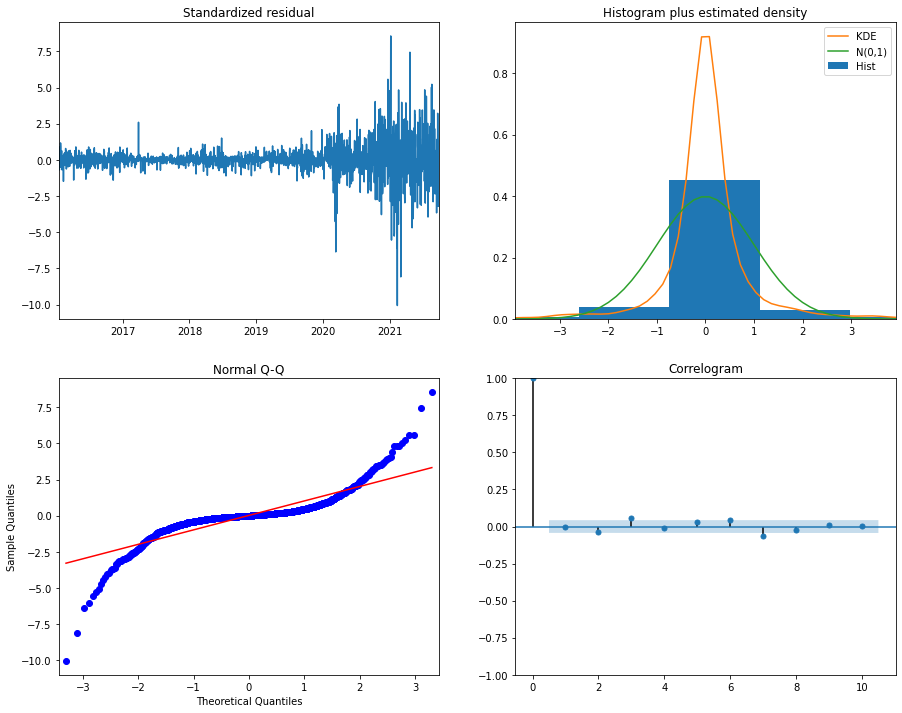

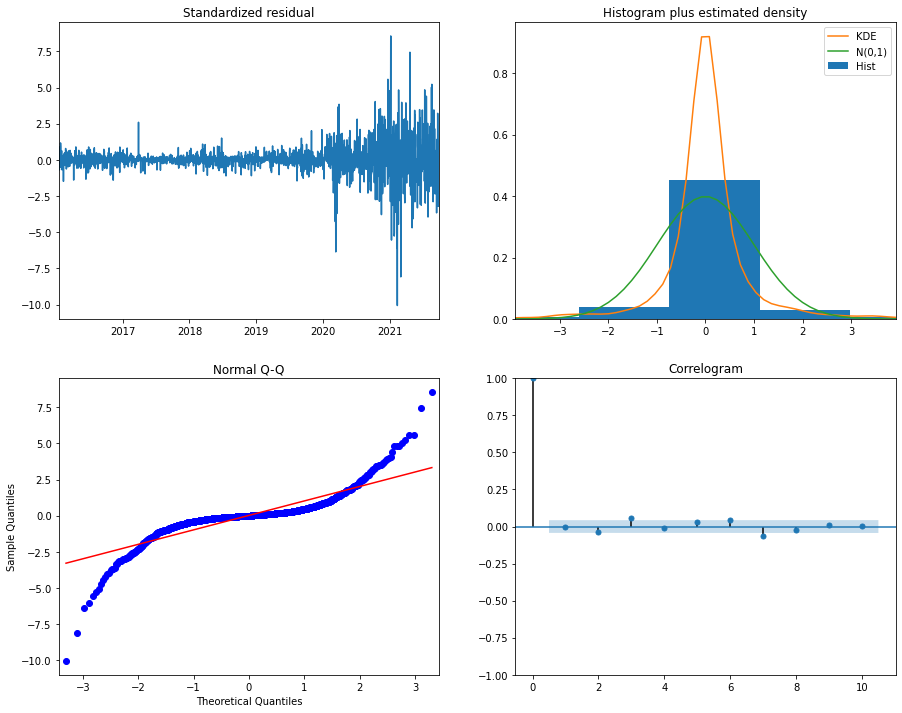

In [549]:
# Diagnosing the model residuals
pred_EDPR.plot_diagnostics(figsize = (15, 12))

##### Validating the Forecast

In [550]:
start = len(train_A)
end   = len(train_A) + len(test_A) - 1
predictions = pred_EDPR.predict(start = start, end = end, dynamic = False, typ = 'levels')

In [551]:
# Create a dataframe to store r2 score
R_SARIMAX_EDPR = pd.DataFrame({'r2_score': r2_score(test_A, predictions)}, index = [0])

# Add columns in the dataframe 'evaluation_results'
R_SARIMAX_EDPR['Model'] = 'SARIMAX'
R_SARIMAX_EDPR.set_index(['Model'], inplace=True)
R_SARIMAX_EDPR['mean_absolute_error'] = mean_absolute_error(test_A, predictions)
R_SARIMAX_EDPR['mean_squared_error'] = mean_squared_error(test_A, predictions)
R_SARIMAX_EDPR['root_mean_squared_error'] = np.sqrt(mean_squared_error(test_A, predictions))
R_SARIMAX_EDPR['mean_absolute_percentage_error'] = np.mean(np.abs(predictions - test_A)
                                                               /np.abs(test_A))*100 
# Display the results
R_SARIMAX_EDPR

r2_score  mean_absolute_error  mean_squared_error  \
Model                                                        
SARIMAX -0.153385             1.632282            3.461564   

         root_mean_squared_error  mean_absolute_percentage_error  
Model                                                             
SARIMAX                 1.860528                        7.652516

#### B.- Vestas Wind Systems A/S (0NMK.IL)

In [404]:
# Divide into train and validation set to calculate R-squared score and mean absolute percentage error 
n=int(len(VWS)* 0.9)
train_B = VWS.Close[:n]
test_B = VWS.Close[n:]


In [544]:
# 12 additional parameter means number of observations per year or the period
SARIMAX_VWS = SARIMAX(train_B , order = (2, 0, 1),seasonal_order = (2, 1, 0, 12)).fit()#(AR,D,MA)#(p,d,q)
#AutoSarima= Score Best model:  ARIMA(2,0,1)(2,1,0)[12]   
#by hand=0, 0, 3 **  0, 1, 2, 12 *** 0.34 Score
# Display the summary of the model
print(SARIMAX_VWS.summary())

                                 Statespace Model Results                                 
Dep. Variable:                              Close   No. Observations:                 2096
Model:             SARIMAX(2, 0, 1)x(2, 1, 0, 12)   Log Likelihood               -8575.800
Date:                            Sun, 22 May 2022   AIC                          17163.600
Time:                                    17:51:20   BIC                          17197.452
Sample:                                01-04-2016   HQIC                         17176.004
                                     - 09-29-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8956      0.061     30.973      0.000       1.776       2.016
ar.L2         -0.9005      0.058   

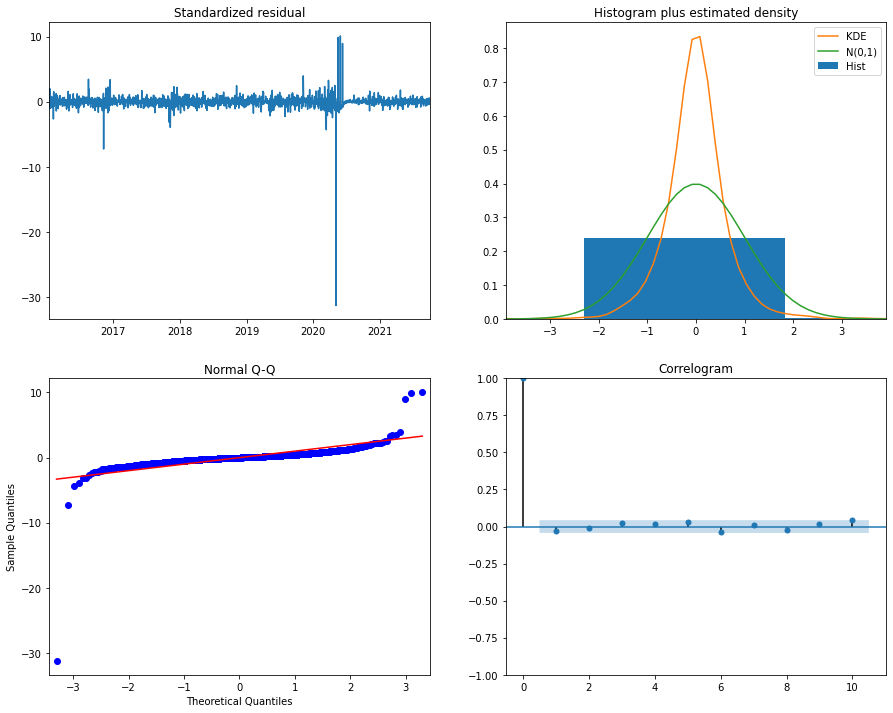

In [545]:
# Diagnosing the model residuals
SARIMAX_VWS.plot_diagnostics(figsize = (15, 12))
plt.show()

##### Validating the Forecast

In [546]:
start = len(train_B)
end   = len(train_B) + len(test_B) - 1
predictions = SARIMAX_VWS.predict(start = start, end = end, dynamic = False)

In [547]:
# Create a dataframe to store r2 score
R_SARIMAX_VWS= pd.DataFrame({'r2_score': r2_score(test_B, predictions)}, index = [0])

# Add columns in the dataframe 'evaluation_results'
R_SARIMAX_VWS['Model'] = 'SARIMAX'
R_SARIMAX_VWS.set_index(['Model'], inplace=True)
R_SARIMAX_VWS['mean_absolute_error'] = mean_absolute_error(test_B, predictions)
R_SARIMAX_VWS['mean_squared_error'] = mean_squared_error(test_B, predictions)
R_SARIMAX_VWS['root_mean_squared_error'] = np.sqrt(mean_squared_error(test_B, predictions))
R_SARIMAX_VWS['mean_absolute_percentage_error'] = np.mean(np.abs(predictions - test_B)
                                                               /np.abs(test_B))*100
# Display the results
R_SARIMAX_VWS

r2_score  mean_absolute_error  mean_squared_error  \
Model                                                        
SARIMAX -3.924371            60.878182          4430.37043   

         root_mean_squared_error  mean_absolute_percentage_error  
Model                                                             
SARIMAX                66.561028                       32.700567

### III.5.- PY TORCH

In [409]:
import torch
from torch import nn, optim
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
import numpy as np

#### A.- EDP Renováveis (0ML1.IL) 

In [410]:
 # We will be using the dataset from the beginning of this notebook with only the columns Date and Close, which are the columns that we need to do this experiment
 base_EDPR = pd.read_csv('EDPR_df.csv')

In [411]:
#Here we can verify that our dataset has only two columns and it has all data from 01/01/2016 to today.
base_EDPR.shape

(1614, 2)

In [412]:
base_EDPR = base_EDPR.dropna()

In [413]:
# In this part of the code, we will split the data into training and test. For this we will use all the data prior to the last 30 days for training and we will use the last 30 days to test it.
EDPR_training_base = base_EDPR.iloc[:-30 , :]
EDPR_test_base = base_EDPR.tail(30)
EDPR_training_base.shape, EDPR_test_base.shape

((1584, 2), (30, 2))

In [414]:
# We can check here that the training dataset uses the first 1582 days(Only weekdays)
EDPR_training_base.tail()

Date      Close
1579  2022-03-30  23.080000
1580  2022-03-31  23.270000
1581  2022-04-01  23.385000
1582  2022-04-04  23.459999
1583  2022-04-05  24.545000

In [415]:
# And here we can see that the test dataset starts exactly one day after the last day on the training dataset
EDPR_test_base.head()

Date      Close
1584  2022-04-06  23.965000
1585  2022-04-07  24.010000
1586  2022-04-08  23.485001
1587  2022-04-11  22.969999
1588  2022-04-12  22.660000

In [416]:
#We are going to get only the values for the column we wanto to work with.
EDPR_training_base_nn = EDPR_training_base.iloc[:, 1:2].values

In [417]:
EDPR_training_base_nn 

array([[ 7.13509989],
       [ 7.30060005],
       [ 7.21512985],
       ...,
       [23.38500023],
       [23.45999908],
       [24.54500008]])

In [418]:
# Here we will normalize the data since we are working with a neural network, it is best if the values are on the same scale.
normalizer = MinMaxScaler(feature_range=(0,1))
EDPR_training_base_normalized = normalizer.fit_transform(EDPR_training_base_nn)

In [419]:
#This is the training base normalized
EDPR_training_base_normalized

array([[0.07334285],
       [0.08151565],
       [0.07729492],
       ...,
       [0.87580311],
       [0.87950674],
       [0.93308677]])

In [420]:
#The idea to train this model is to use the first 90 values to predict the next price and so on. So to each price we will predict we will use the last 90 values.
X = []
y = []
for i in range(90, len(EDPR_training_base_normalized)):
  X.append(EDPR_training_base_normalized[i-90:i, 0])
  y.append(EDPR_training_base_normalized[i, 0])# This will always be the next value after the 90th value.
X, y = np.array(X), np.array(y)

In [421]:
#First 90 predictive registers to get the next price
X[0]

array([0.07334285, 0.08151565, 0.07729492, 0.07751073, 0.07637493,
       0.06780706, 0.07244903, 0.07960949, 0.07247371, 0.06148612,
       0.05970836, 0.05318988, 0.04430497, 0.04457261, 0.05862193,
       0.06030093, 0.07007866, 0.07314038, 0.07394778, 0.07400457,
       0.07620209, 0.06894287, 0.06749351, 0.05896761, 0.05733799,
       0.04681953, 0.04291831, 0.04953555, 0.03220231, 0.0300211 ,
       0.03737019, 0.03803684, 0.03654057, 0.03931339, 0.03706648,
       0.03711588, 0.03950104, 0.03924673, 0.0370418 , 0.04207979,
       0.04790593, 0.04889358, 0.04701459, 0.04708126, 0.04594545,
       0.04003437, 0.0397356 , 0.03778748, 0.03784672, 0.04284918,
       0.0453504 , 0.04307387, 0.03663191, 0.04123931, 0.04467631,
       0.04667631, 0.05389109, 0.05309604, 0.05343677, 0.05343677,
       0.05343677, 0.05343677, 0.05343677, 0.05343677, 0.05343677,
       0.05343677, 0.0379529 , 0.0379529 , 0.04143683, 0.03610353,
       0.04323189, 0.04326399, 0.04317262, 0.04545411, 0.05065

In [422]:
#First price after the 90 before
y[0]

0.052120729299653

In [423]:
# We need to convert the data to the pytorch format
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

In [424]:
#We are going to use this to train the model
dataset_EDPR = torch.utils.data.TensorDataset(X, y)
loader_EDPR = torch.utils.data.DataLoader(dataset_EDPR, batch_size=32, shuffle=True)

##### Building the Recurrent Neural Network (LSTM)

In [425]:

class regressor_LSTM_EDPR(nn.Module):
  def __init__(self): #constructor method
    super().__init__()

    self.lstm1_EDPR = nn.LSTM(input_size=1, hidden_size=100) #First layer of the network
    self.lstm2_EDPR = nn.LSTM(100, 50)
    self.lstm3_EDPR = nn.LSTM(50, 50, dropout = 0.3, num_layers=2)
    self.dropout_EDPR = nn.Dropout(p = 0.3)
    self.linear_EDPR = nn.Linear(in_features=50, out_features=1)

  def forward(self, X):
    # (batch_size, timesteps = 90 in this case) -> (timesteps, batch_size, dimensions)
    X = X.permute(1, 0).unsqueeze(2)
    X, _ = self.lstm1_EDPR(X)
    X = self.dropout_EDPR(X)
    X, _ = self.lstm2_EDPR(X)
    X = self.dropout_EDPR(X)
    X, _ = self.lstm3_EDPR(X)

    X = X[-1]
    X = self.dropout_EDPR(X)
    X = self.linear_EDPR(X)

    return X

In [426]:
# We do this to access the gpu 
device_pc = torch.device('cuda') if torch.cuda.is_available else torch.device('cpu')
device_pc

device(type='cuda')

In [427]:
#Here we will create the regressor for the LSTM, our accuracy criterion is MSE.
regressor_EDPR = regressor_LSTM_EDPR()
criterion = nn.MSELoss()

optimizer_EDPR = optim.RMSprop(regressor_EDPR.parameters(), lr = 1e-3, alpha = 0.9)

In [428]:
regressor_EDPR.to(device_pc)

regressor_LSTM_EDPR(
  (lstm1_EDPR): LSTM(1, 100)
  (lstm2_EDPR): LSTM(100, 50)
  (lstm3_EDPR): LSTM(50, 50, num_layers=2, dropout=0.3)
  (dropout_EDPR): Dropout(p=0.3, inplace=False)
  (linear_EDPR): Linear(in_features=50, out_features=1, bias=True)
)

##### Training the Model


In [429]:
#With this piece of code we will do the training of the model
for epoch in range (100): #100 epochs of training
  running_loss_EDPR = 0.
  running_mae_EDPR = 0.

  for i, data in enumerate(loader_EDPR):
    inputs, labels = data 
    inputs, labels = inputs.to(device_pc), labels.to(device_pc)

    optimizer_EDPR.zero_grad()

    outputs = regressor_EDPR(inputs)
    outputs = outputs.flatten()

    loss = criterion(outputs, labels)
    loss.backward()

    optimizer_EDPR.step()

    running_loss_EDPR += loss.item()

    mae = mean_absolute_error(labels.detach().cpu().numpy().flatten(),
                              outputs.detach().cpu().numpy().flatten())
    running_mae_EDPR +=mae
    #Printing the data regarding this loop
    print('\rEpoch {:3d} - Loop {:3d} of {:3d}: cost {:03.5f} - MAE {:03.5f}'.format(epoch+1, i+1, len(loader_EDPR), loss, mae), end = '\r')

#Printing the data regarding this epoch
running_loss_EDPR /= len(loader_EDPR)
running_mae_EDPR /= len(loader_EDPR)
print('\rEpoch {:3d} Finished: cost {:03.6f} - MAE {:03.6f}'.format(epoch+1, running_loss_EDPR, running_mae_EDPR))

Epoch 100 Finished: cost 0.001575 - MAE 0.028695


##### Evaluating the model

In [430]:
EDPR_test_base.head()

Date      Close
1584  2022-04-06  23.965000
1585  2022-04-07  24.010000
1586  2022-04-08  23.485001
1587  2022-04-11  22.969999
1588  2022-04-12  22.660000

In [431]:
EDPR_test_base.shape

(30, 2)

In [432]:
real_price = EDPR_test_base.iloc[:, 1:2].values

In [433]:
real_price

array([[23.96500015],
       [24.01000023],
       [23.48500061],
       [22.96999931],
       [22.65999985],
       [22.84000015],
       [23.17000008],
       [22.68499947],
       [23.06500053],
       [22.86000061],
       [22.68000031],
       [22.99500084],
       [22.75      ],
       [22.61499977],
       [22.83499908],
       [22.52000046],
       [21.41500092],
       [21.12999916],
       [20.62999916],
       [21.19000053],
       [20.35750008],
       [20.78499985],
       [20.76000023],
       [20.12000084],
       [20.33749962],
       [20.47999954],
       [20.75499916],
       [20.63999939],
       [21.54500008],
       [21.80500031]])

In [434]:
complete_base_EDPR = pd.concat((EDPR_training_base['Close'], EDPR_test_base['Close']), axis = 0 )

In [435]:
complete_base_EDPR.shape

(1614,)

In [436]:
entries_EDPR = complete_base_EDPR[len(complete_base_EDPR)-len(EDPR_test_base)-90:].values

In [437]:
entries_EDPR

array([22.54000092, 22.70000076, 22.57999992, 22.36000061, 21.79999924,
       21.34000015, 21.56999969, 22.27000046, 22.04999924, 22.18000031,
       21.73999977, 21.71999931, 20.92000008, 21.05999947, 21.42000008,
       21.34000015, 21.37000084, 21.54000092, 21.48999977, 21.95999908,
       21.70999908, 21.69000053, 21.76000023, 21.79999924, 21.61000061,
       20.84000015, 19.95499992, 19.53499985, 19.44000053, 19.55999947,
       19.98500061, 19.77000046, 19.39999962, 19.32500076, 18.95499992,
       19.18000031, 20.04000092, 19.22999954, 18.61499977, 18.15999985,
       18.62000084, 18.62000084, 18.04999924, 18.45000076, 18.78499985,
       19.06500053, 18.43000031, 18.04999924, 18.18000031, 17.87999916,
       18.32999992, 17.79000092, 17.19000053, 16.80500031, 17.79999924,
       17.93499947, 18.61499977, 18.44499969, 17.96500015, 17.73999977,
       17.95999908, 19.88500023, 19.93499947, 21.78000069, 21.42000008,
       21.23999977, 20.40500069, 20.55999947, 21.75      , 22.72

In [438]:
entries_EDPR.shape

(120,)

In [439]:
entries_EDPR = entries_EDPR.reshape(-1,1)
entries_EDPR.shape

(120, 1)

In [440]:
entries_EDPR= normalizer.transform(entries_EDPR)
entries_EDPR

array([[0.83407495],
       [0.84197614],
       [0.8360502 ],
       [0.82518609],
       [0.79753184],
       [0.77481595],
       [0.7861739 ],
       [0.82074166],
       [0.80987746],
       [0.81629723],
       [0.79456892],
       [0.79358125],
       [0.75407531],
       [0.76098882],
       [0.77876654],
       [0.77481595],
       [0.77629746],
       [0.78469248],
       [0.7822233 ],
       [0.80543303],
       [0.79308741],
       [0.79209983],
       [0.79555659],
       [0.79753184],
       [0.78814924],
       [0.75012471],
       [0.70642121],
       [0.68568057],
       [0.68098927],
       [0.68691511],
       [0.70790272],
       [0.69728548],
       [0.67901393],
       [0.6753103 ],
       [0.65703874],
       [0.66814982],
       [0.71061877],
       [0.6706189 ],
       [0.64024869],
       [0.61777967],
       [0.64049566],
       [0.64049566],
       [0.61234757],
       [0.63210063],
       [0.64864372],
       [0.66247084],
       [0.63111296],
       [0.612

In [441]:
X_test = []
for i in range(90, 120):
  X_test.append(entries_EDPR[i-90:i,0])
X_test = np.array(X_test)  

In [442]:
X_test[29]

array([0.68691511, 0.70790272, 0.69728548, 0.67901393, 0.6753103 ,
       0.65703874, 0.66814982, 0.71061877, 0.6706189 , 0.64024869,
       0.61777967, 0.64049566, 0.64049566, 0.61234757, 0.63210063,
       0.64864372, 0.66247084, 0.63111296, 0.61234757, 0.61876734,
       0.60395254, 0.62617469, 0.59950821, 0.56987871, 0.55086644,
       0.60000195, 0.60666859, 0.64024869, 0.63185367, 0.6081501 ,
       0.59703903, 0.60790314, 0.70296445, 0.70543354, 0.79654426,
       0.77876654, 0.76987768, 0.72864336, 0.73629759, 0.79506276,
       0.84345756, 0.85975377, 0.82666751, 0.84691431, 0.80197627,
       0.80691454, 0.79901335, 0.81530956, 0.84296372, 0.82469226,
       0.83407495, 0.81530956, 0.82222308, 0.82765518, 0.84148231,
       0.82222308, 0.86074144, 0.87012414, 0.87580311, 0.87950674,
       0.93308677, 0.90444494, 0.90666716, 0.88074138, 0.85530934,
       0.8400008 , 0.84888966, 0.86518587, 0.84123534, 0.86000073,
       0.84987733, 0.84098847, 0.85654398, 0.84444523, 0.83777

##### Forecast

In [443]:
#We do this to convert from the numpy array format to the torch format in order to do the forecasts
X_test = torch.tensor(X_test, device = device_pc, dtype = torch.float32)

In [444]:
regressor_EDPR.eval()
forecast_EDPR = regressor_EDPR.forward(X_test)

In [445]:
forecast_EDPR

tensor([[0.8709],
        [0.8758],
        [0.8762],
        [0.8731],
        [0.8688],
        [0.8649],
        [0.8643],
        [0.8666],
        [0.8632],
        [0.8614],
        [0.8603],
        [0.8576],
        [0.8574],
        [0.8552],
        [0.8506],
        [0.8488],
        [0.8450],
        [0.8257],
        [0.8013],
        [0.7790],
        [0.7746],
        [0.7551],
        [0.7376],
        [0.7286],
        [0.7098],
        [0.6970],
        [0.6966],
        [0.7050],
        [0.7050],
        [0.7217]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [446]:
forecast_EDPR.shape

torch.Size([30, 1])

In [447]:
#Convert from pytorch format to numpy array
forecast_EDPR = forecast_EDPR.detach().cpu().numpy().reshape(-1,1)

In [448]:
forecast_EDPR.shape

(30, 1)

In [449]:
#To get the real values 
forecast_EDPR = normalizer.inverse_transform(forecast_EDPR)

In [450]:
forecast_EDPR.mean()

22.050404

In [451]:
real_price.mean()

22.001833343505858

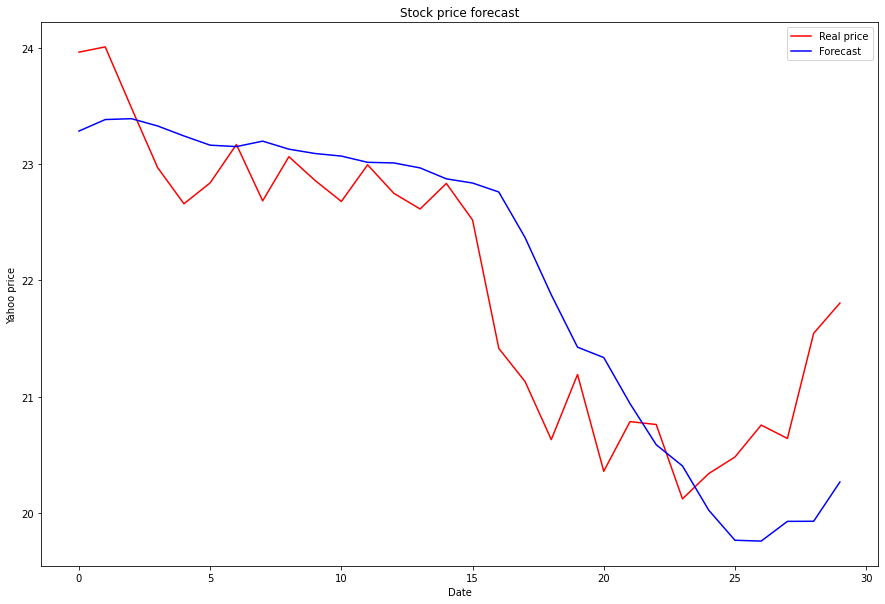

In [452]:
plt.plot(real_price, color= 'red', label= 'Real price')
plt.plot(forecast_EDPR, color = 'blue', label = 'Forecast')
plt.title('Stock price forecast')
plt.xlabel('Date')
plt.ylabel('Yahoo price')
plt.legend()


In [453]:
# Create a dataframe to store r2 score
NEURAL_NET= pd.DataFrame({'r2_score': r2_score(real_price, forecast_EDPR)}, index = [0])

# Add columns in the dataframe 'evaluation_results'
NEURAL_NET['Model'] = 'NEURAL_NET'
NEURAL_NET.set_index(['Model'], inplace=True)
NEURAL_NET['mean_absolute_error'] = mean_absolute_error(real_price, forecast_EDPR)
NEURAL_NET['mean_squared_error'] = mean_squared_error(real_price, forecast_EDPR)
NEURAL_NET['root_mean_squared_error'] = np.sqrt(mean_squared_error(real_price, forecast_EDPR))
NEURAL_NET['mean_absolute_percentage_error'] = np.mean(np.abs(forecast_EDPR - real_price)
                                                               /np.abs(real_price))*100
# Display the results
NEURAL_NET

r2_score  mean_absolute_error  mean_squared_error  \
Model                                                           
NEURAL_NET   0.62396             0.547937            0.512146   

            root_mean_squared_error  mean_absolute_percentage_error  
Model                                                                
NEURAL_NET                 0.715644                        2.537959

#### B.- Vestas Wind Systems A/S (VWS.CO)

In [454]:
 # We will be using the dataset from the beginning of this notebook with only the columns Date and Close, which are the columns that we need to do this experiment
 base_VWS = pd.read_csv('VWS_df.csv')

In [455]:
#Here we can verify that our dataset has only two columns and it has all data from 01/01/2016 to today.
base_VWS.shape

(1614, 2)

In [456]:
base_VWS = base_VWS.dropna()

In [457]:
# In this part of the code, we will split the data into training and test. For this we will use all the data prior to the last 30 days for training and we will use the last 30 days to test it.
VWS_training_base = base_VWS.iloc[:-30 , :]
VWS_test_base = base_VWS.tail(30)
VWS_training_base.shape, VWS_test_base.shape

((1584, 2), (30, 2))

In [458]:
# We can check here that the training dataset uses the first 1582 days(Only weekdays)
VWS_training_base.tail()

Date       Close
1579  2022-03-30  200.000000
1580  2022-03-31  201.000000
1581  2022-04-01  209.350006
1582  2022-04-04  200.449997
1583  2022-04-05  218.100006

In [459]:
# And here we can see that the test dataset starts exactly one day after the last day on the training dataset
VWS_test_base.head()

Date       Close
1584  2022-04-06  210.925003
1585  2022-04-07  207.899994
1586  2022-04-08  212.100006
1587  2022-04-11  212.399994
1588  2022-04-12  202.205002

In [460]:
#We are going to get only the values for the column we wanto to work with.
VWS_training_base_nn = VWS_training_base.iloc[:, 1:2].values

In [461]:
VWS_training_base_nn 

array([[475.46890259],
       [475.20001221],
       [468.3999939 ],
       ...,
       [209.3500061 ],
       [200.44999695],
       [218.1000061 ]])

In [462]:
# Here we will normalize the data since we are working with a neural network, it is best if the values are on the same scale.
normalizer = MinMaxScaler(feature_range=(0,1))
VWS_training_base_normalized = normalizer.fit_transform(VWS_training_base_nn)

In [463]:
#This is the training base normalized
VWS_training_base_normalized

array([[0.59593821],
       [0.59549336],
       [0.58424324],
       ...,
       [0.15566475],
       [0.14094036],
       [0.17014096]])

In [464]:
#The idea to train this model is to use the first 90 values to predict the next price and so on. So to each price we will predict we will use the last 90 values.
X = []
y = []
for i in range(90, len(VWS_training_base_normalized)):
  X.append(VWS_training_base_normalized[i-90:i, 0])
  y.append(VWS_training_base_normalized[i, 0])# This will always be the next value after the 90th value.
X, y = np.array(X), np.array(y)

In [465]:
#First 90 predictive registers to get the next price
X[0]

array([0.59593821, 0.59549336, 0.58424324, 0.57085452, 0.56754683,
       0.54034391, 0.54732437, 0.57140873, 0.54056646, 0.52127688,
       0.48620454, 0.53924294, 0.51208556, 0.50431929, 0.52124376,
       0.52484944, 0.52269209, 0.53452783, 0.52870432, 0.54883858,
       0.54586064, 0.52451853, 0.5157501 , 0.51244126, 0.51012507,
       0.44245915, 0.4756226 , 0.52293878, 0.50416914, 0.50360613,
       0.52045664, 0.53548303, 0.54015286, 0.54751506, 0.5395738 ,
       0.55479452, 0.56852622, 0.54933489, 0.56695454, 0.5753028 ,
       0.56554827, 0.58962219, 0.59280093, 0.58233122, 0.57907019,
       0.56629273, 0.55743494, 0.55686255, 0.54908674, 0.55458499,
       0.56232213, 0.56036931, 0.56230723, 0.56819536, 0.57568021,
       0.57820461, 0.57497508, 0.57933187, 0.57944542, 0.56753355,
       0.58862503, 0.57711733, 0.57363979, 0.5711733 , 0.56174307,
       0.56695454, 0.55545628, 0.56836076, 0.56356294, 0.55404289,
       0.55628349, 0.56457   , 0.55314009, 0.54933489, 0.55629

In [466]:
#First price after the 90 before
y[0]

0.5624853069090008

In [467]:
# We need to convert the data to the pytorch format
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

In [468]:
#We are going to use this to train the model
dataset_VWS = torch.utils.data.TensorDataset(X, y)
loader_VWS = torch.utils.data.DataLoader(dataset_VWS, batch_size=32, shuffle=True)

##### Building the Recurrent Neural Network (LSTM)

In [469]:
class regressor_LSTM_VWS(nn.Module):
  def __init__(self): #constructor method
    super().__init__()

    self.lstm1_VWS = nn.LSTM(input_size=1, hidden_size=100) #First layer of the network
    self.lstm2_VWS = nn.LSTM(100, 50)
    self.lstm3_VWS = nn.LSTM(50, 50, dropout = 0.3, num_layers=2)
    self.dropout_VWS = nn.Dropout(p = 0.3)
    self.linear_VWS = nn.Linear(in_features=50, out_features=1)

  def forward(self, X):
    # (batch_size, timesteps = 90 in this case) -> (timesteps, batch_size, dimensions)
    X = X.permute(1, 0).unsqueeze(2)
    X, _ = self.lstm1_VWS(X)
    X = self.dropout_VWS(X)
    X, _ = self.lstm2_VWS(X)
    X = self.dropout_VWS(X)
    X, _ = self.lstm3_VWS(X)

    X = X[-1]
    X = self.dropout_VWS(X)
    X = self.linear_VWS(X)

    return X

In [470]:
# We do this to access the gpu 
device_pc_VWS = torch.device('cuda') if torch.cuda.is_available else torch.device('cpu')
device_pc_VWS

device(type='cuda')

In [471]:
#Here we will create the regressor for the LSTM, our accuracy criterion is MSE.
regressor_VWS = regressor_LSTM_VWS()
criterion_VWS = nn.MSELoss()
optimizer_VWS = optim.RMSprop(regressor_VWS.parameters(), lr = 1e-3, alpha = 0.9)

In [472]:
regressor_VWS.to(device_pc_VWS)

regressor_LSTM_VWS(
  (lstm1_VWS): LSTM(1, 100)
  (lstm2_VWS): LSTM(100, 50)
  (lstm3_VWS): LSTM(50, 50, num_layers=2, dropout=0.3)
  (dropout_VWS): Dropout(p=0.3, inplace=False)
  (linear_VWS): Linear(in_features=50, out_features=1, bias=True)
)

In [473]:
#With this piece of code we will do the training of the model
for epoch in range (100): #100 epochs of training
  running_loss_VWS = 0.
  running_mae_VWS = 0.

  for i, data in enumerate(loader_VWS):
    inputs, labels = data 
    inputs, labels = inputs.to(device_pc_VWS), labels.to(device_pc_VWS)

    optimizer_VWS.zero_grad()

    outputs = regressor_VWS(inputs)
    outputs = outputs.flatten()

    loss = criterion_VWS(outputs, labels)
    loss.backward()

    optimizer_VWS.step()

    running_loss_VWS += loss.item()

    mae = mean_absolute_error(labels.detach().cpu().numpy().flatten(),
                              outputs.detach().cpu().numpy().flatten())
    running_mae_VWS +=mae
    #Printing the data regarding this loop
    print('\rEpoch {:3d} - Loop {:3d} of {:3d}: cost {:03.5f} - MAE {:03.5f}'.format(epoch+1, i+1, len(loader_VWS), loss, mae), end = '\r')

#Printing the data regarding this epoch
running_loss_VWS /= len(loader_VWS)
running_mae_VWS /= len(loader_VWS)
print('\rEpoch {:3d} Finished: cost {:03.6f} - MAE {:03.6f}'.format(epoch+1, running_loss_VWS, running_mae_VWS))

Epoch 100 Finished: cost 0.002031 - MAE 0.032304


##### Evaluating the model

In [474]:
VWS_test_base.head()

Date       Close
1584  2022-04-06  210.925003
1585  2022-04-07  207.899994
1586  2022-04-08  212.100006
1587  2022-04-11  212.399994
1588  2022-04-12  202.205002

In [475]:
VWS_test_base.shape

(30, 2)

In [476]:
real_price_VWS = VWS_test_base.iloc[:, 1:2].values

In [477]:
real_price_VWS

array([[210.92500305],
       [207.8999939 ],
       [212.1000061 ],
       [212.3999939 ],
       [202.20500183],
       [199.41499329],
       [199.41499329],
       [200.44999695],
       [207.7749939 ],
       [202.77000427],
       [193.17999268],
       [190.3500061 ],
       [178.61999512],
       [178.05000305],
       [176.07000732],
       [183.21000671],
       [173.80999756],
       [174.33999634],
       [173.03999329],
       [163.86000061],
       [154.3500061 ],
       [152.49000549],
       [155.22999573],
       [147.08000183],
       [147.08000183],
       [149.1499939 ],
       [151.96000671],
       [155.8500061 ],
       [157.08000183],
       [156.3999939 ]])

In [478]:
complete_base_VWS = pd.concat((VWS_training_base['Close'], VWS_test_base['Close']), axis = 0 )

In [479]:
complete_base_VWS.shape

(1614,)

In [480]:
entries_VWS = complete_base_VWS[len(complete_base_VWS)-len(VWS_test_base)-90:].values

In [481]:
entries_VWS

array([223.5       , 222.5       , 219.5       , 215.5       ,
       208.        , 202.        , 203.        , 214.5       ,
       215.5       , 213.        , 207.        , 204.        ,
       195.        , 194.        , 197.75      , 193.        ,
       189.        , 191.        , 192.75      , 195.25      ,
       195.25      , 195.5       , 200.        , 200.        ,
       199.        , 195.5       , 188.25      , 183.25      ,
       180.75      , 183.25      , 182.25      , 186.75      ,
       183.75      , 186.75      , 182.75      , 182.25      ,
       191.5       , 177.75      , 171.5       , 166.25      ,
       176.25      , 176.75      , 168.75      , 175.25      ,
       170.        , 174.25      , 167.5       , 166.25      ,
       166.        , 161.25      , 169.75      , 164.75      ,
       167.75      , 162.25      , 175.75      , 171.75      ,
       171.5       , 165.5       , 162.25      , 165.        ,
       161.25      , 181.25      , 188.75      , 216.5 

In [482]:
entries_VWS.shape

(120,)

In [483]:
entries_VWS = entries_VWS.reshape(-1,1)
entries_VWS.shape

(120, 1)

In [484]:
entries_VWS= normalizer.transform(entries_VWS)
entries_VWS

array([[0.17907484],
       [0.17742042],
       [0.17245714],
       [0.16583945],
       [0.15343127],
       [0.14350473],
       [0.14515915],
       [0.16418502],
       [0.16583945],
       [0.16170339],
       [0.15177685],
       [0.14681357],
       [0.13192376],
       [0.13026933],
       [0.13647342],
       [0.12861491],
       [0.12199722],
       [0.12530606],
       [0.1282013 ],
       [0.13233736],
       [0.13233736],
       [0.13275097],
       [0.14019588],
       [0.14019588],
       [0.13854145],
       [0.13275097],
       [0.1207564 ],
       [0.11248428],
       [0.10834822],
       [0.11248428],
       [0.11082985],
       [0.11827476],
       [0.11331149],
       [0.11827476],
       [0.11165707],
       [0.11082985],
       [0.12613327],
       [0.10338495],
       [0.0930448 ],
       [0.08435907],
       [0.10090331],
       [0.10173052],
       [0.08849513],
       [0.09924889],
       [0.09056316],
       [0.09759446],
       [0.0864271 ],
       [0.084

In [485]:
X_test_VWS = []
for i in range(90, 120):
  X_test_VWS.append(entries_VWS[i-90:i,0])
X_test_VWS = np.array(X_test_VWS) 

In [486]:
X_test_VWS[1]

array([0.17742042, 0.17245714, 0.16583945, 0.15343127, 0.14350473,
       0.14515915, 0.16418502, 0.16583945, 0.16170339, 0.15177685,
       0.14681357, 0.13192376, 0.13026933, 0.13647342, 0.12861491,
       0.12199722, 0.12530606, 0.1282013 , 0.13233736, 0.13233736,
       0.13275097, 0.14019588, 0.14019588, 0.13854145, 0.13275097,
       0.1207564 , 0.11248428, 0.10834822, 0.11248428, 0.11082985,
       0.11827476, 0.11331149, 0.11827476, 0.11165707, 0.11082985,
       0.12613327, 0.10338495, 0.0930448 , 0.08435907, 0.10090331,
       0.10173052, 0.08849513, 0.09924889, 0.09056316, 0.09759446,
       0.0864271 , 0.08435907, 0.08394547, 0.07608695, 0.09014955,
       0.08187744, 0.08684071, 0.07774138, 0.1000761 , 0.0934584 ,
       0.0930448 , 0.08311825, 0.07774138, 0.08229104, 0.07608695,
       0.10917543, 0.12158361, 0.16749387, 0.16583945, 0.1418503 ,
       0.13357818, 0.13357818, 0.16418502, 0.20140956, 0.17245714,
       0.15674012, 0.16418502, 0.14681357, 0.13688703, 0.14639

##### Forecast

In [487]:
#We do this to convert from the numpy array format to the torch format in order to do the forecasts
X_test_VWS = torch.tensor(X_test_VWS, device = device_pc_VWS, dtype = torch.float32)

In [488]:
regressor_VWS.eval()
forecast_VWS = regressor_VWS.forward(X_test_VWS)

In [489]:
forecast_VWS

tensor([[0.1442],
        [0.1473],
        [0.1466],
        [0.1478],
        [0.1499],
        [0.1469],
        [0.1430],
        [0.1413],
        [0.1410],
        [0.1434],
        [0.1431],
        [0.1383],
        [0.1340],
        [0.1279],
        [0.1233],
        [0.1199],
        [0.1197],
        [0.1166],
        [0.1135],
        [0.1114],
        [0.1074],
        [0.1012],
        [0.0963],
        [0.0939],
        [0.0902],
        [0.0865],
        [0.0844],
        [0.0837],
        [0.0838],
        [0.0840]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [490]:
forecast_VWS.shape

torch.Size([30, 1])

In [491]:
#Convert from pytorch format to numpy array
forecast_VWS = forecast_VWS.detach().cpu().numpy().reshape(-1,1)

In [492]:
forecast_VWS.shape

(30, 1)

In [493]:
#To get the real values 
forecast_VWS = normalizer.inverse_transform(forecast_VWS)

In [494]:
forecast_VWS.mean()

188.00348

In [495]:
real_price_VWS.mean()

178.88516642252605

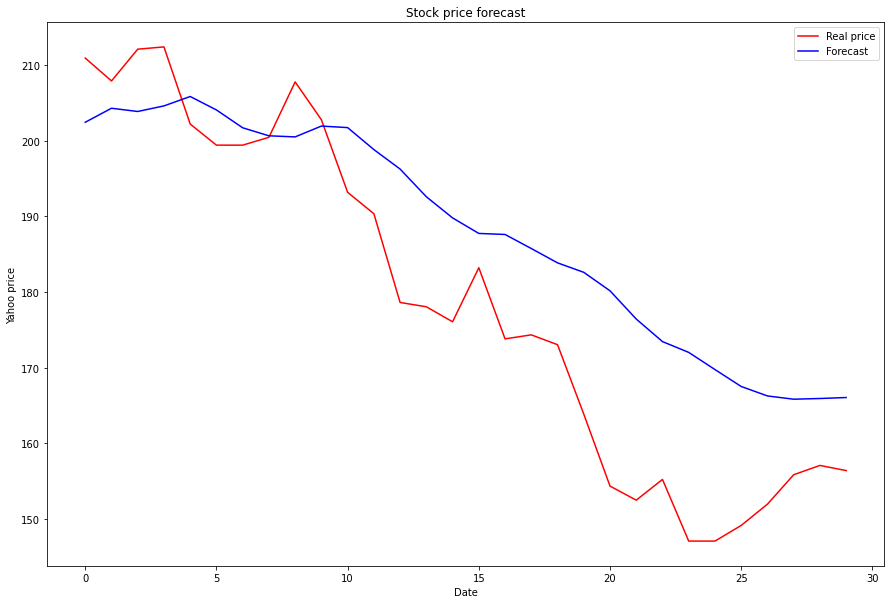

In [496]:
plt.plot(real_price_VWS, color= 'red', label= 'Real price')
plt.plot(forecast_VWS, color = 'blue', label = 'Forecast')
plt.title('Stock price forecast')
plt.xlabel('Date')
plt.ylabel('Yahoo price')
plt.legend()

In [497]:
# Create a dataframe to store r2 score
NEURAL_NET_VWS= pd.DataFrame({'r2_score': r2_score(real_price_VWS, forecast_VWS)}, index = [0])

# Add columns in the dataframe 'evaluation_results'
NEURAL_NET_VWS['Model'] = 'NEURAL_NET_VWS'
NEURAL_NET_VWS.set_index(['Model'], inplace=True)
NEURAL_NET_VWS['mean_absolute_error'] = mean_absolute_error(real_price_VWS, forecast_VWS)
NEURAL_NET_VWS['mean_squared_error'] = mean_squared_error(real_price_VWS, forecast_VWS)
NEURAL_NET_VWS['root_mean_squared_error'] = np.sqrt(mean_squared_error(real_price_VWS, forecast_VWS))
NEURAL_NET_VWS['mean_absolute_percentage_error'] = np.mean(np.abs(forecast_VWS - real_price_VWS)
                                                               /np.abs(real_price_VWS))*100
# Display the results
NEURAL_NET_VWS

r2_score  mean_absolute_error  mean_squared_error  \
Model                                                               
NEURAL_NET_VWS  0.634335             11.53364          183.118992   

                root_mean_squared_error  mean_absolute_percentage_error  
Model                                                                    
NEURAL_NET_VWS                13.532147                        6.948343

### III.6.-Facebook Prophet

#### A.- EDP Renováveis (0ML1.IL) 

In [498]:
dataset_EDPR = pd.read_csv('EDPR_df.csv')
dataset_EDPR.head()

Date    Close
0  2016-01-04  7.13510
1  2016-01-05  7.30060
2  2016-01-06  7.21513
3  2016-01-07  7.21950
4  2016-01-08  7.19650

In [499]:
dataset_EDPR = dataset_EDPR[['Date', 'Close']].rename(columns = {'Date': 'ds', 'Close': 'y'})
dataset_EDPR.head()

ds        y
0  2016-01-04  7.13510
1  2016-01-05  7.30060
2  2016-01-06  7.21513
3  2016-01-07  7.21950
4  2016-01-08  7.19650

In [500]:
dataset_EDPR.tail()

ds          y
1609  2022-05-16  20.480000
1610  2022-05-17  20.754999
1611  2022-05-18  20.639999
1612  2022-05-19  21.545000
1613  2022-05-20  21.805000

In [501]:
dataset_EDPR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1614 entries, 0 to 1613
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      1614 non-null   object 
 1   y       1614 non-null   float64
dtypes: float64(1), object(1)
memory usage: 25.3+ KB


In [502]:
dataset_EDPR.shape

(1614, 2)

In [503]:
#Split into train / test 

train_EDPR = dataset_EDPR.iloc[:-60 , :]
test_EDPR = dataset_EDPR.tail(60)


In [504]:
train_EDPR.tail()

ds          y
1549  2022-02-16  17.934999
1550  2022-02-17  18.615000
1551  2022-02-18  18.445000
1552  2022-02-21  17.965000
1553  2022-02-22  17.740000

In [505]:
test_EDPR.head()

ds          y
1554  2022-02-23  17.959999
1555  2022-02-24  19.885000
1556  2022-02-25  19.934999
1557  2022-02-28  21.780001
1558  2022-03-01  21.420000

In [506]:
test_EDPR.tail(3)

ds          y
1611  2022-05-18  20.639999
1612  2022-05-19  21.545000
1613  2022-05-20  21.805000

In [507]:
test_EDPR.shape, train_EDPR.shape

((60, 2), (1554, 2))

In [508]:
model = Prophet()
model.fit(train_EDPR)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [509]:
future_EDPR = model.make_future_dataframe(periods=60, freq='d', include_history = True ) # With this line of code the model will make predictions for the next 60 days

In [510]:
preds_train_EDPR = model.predict(future_EDPR)

In [511]:
preds_train_EDPR.tail()

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
1609 2022-04-19  21.674811   20.532679   23.011636    21.587135    21.757678   
1610 2022-04-20  21.680038   20.485038   23.081742    21.587506    21.767259   
1611 2022-04-21  21.685265   20.397435   23.083871    21.585884    21.775827   
1612 2022-04-22  21.690492   20.410449   23.012519    21.587137    21.782909   
1613 2022-04-23  21.695719   20.502112   23.205757    21.587041    21.789991   

      additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
1609        0.066347              0.066347              0.066347 -0.019324   
1610        0.086404              0.086404              0.086404 -0.006036   
1611        0.087606              0.087606              0.087606 -0.007099   
1612        0.045985              0.045985              0.045985 -0.046606   
1613        0.145007              0.145007              0.145007  0.058708   

      weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
1609     -0.019324     -0.019324  0.085671      0.085671      0.085671   
1610     -0.006036     -0.006036  0.092440      0.092440      0.092440   
1611     -0.007099     -0.007099  0.094706      0.094706      0.094706   
1612     -0.046606     -0.046606  0.092591      0.092591      0.092591   
1613      0.058708      0.058708  0.086298      0.086298      0.086298   

      multiplicative_terms  multiplicative_terms_lower  \
1609                   0.0                         0.0   
1610                   0.0                         0.0   
1611                   0.0                         0.0   
1612                   0.0                         0.0   
1613                   0.0                         0.0   

      multiplicative_terms_upper       yhat  
1609                         0.0  21.741158  
1610                         0.0  21.766442  
1611                         0.0  21.772871  
1612                         0.0  21.736477  
1613                         0.0  21.840725

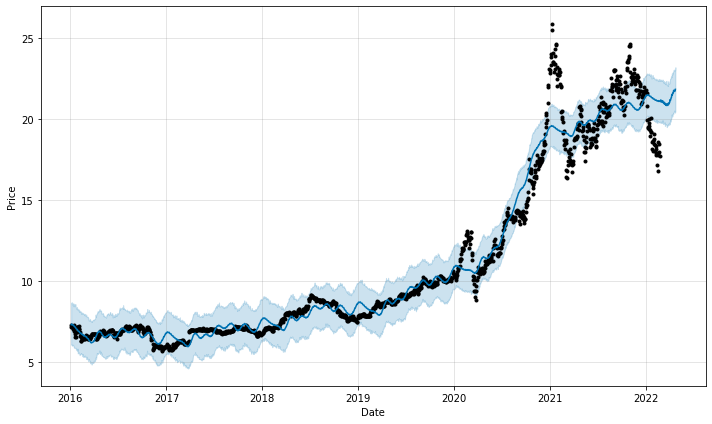

In [512]:
model.plot(preds_train_EDPR, xlabel = 'Date', ylabel = 'Price');

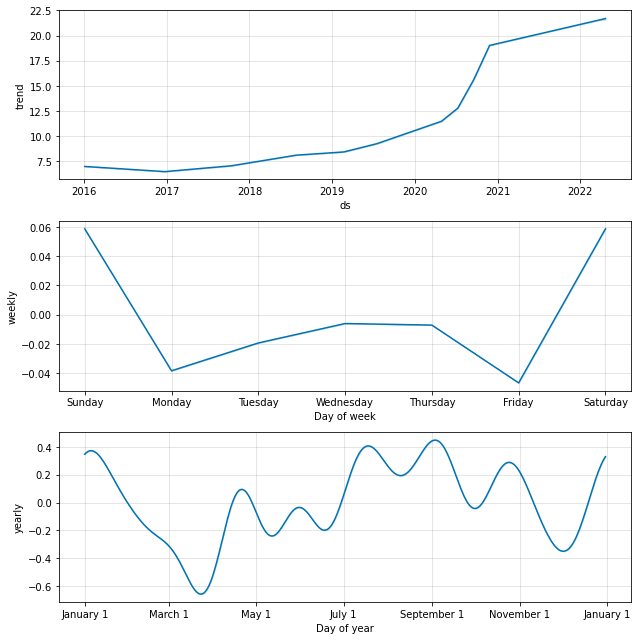

In [513]:
model.plot_components(preds_train_EDPR);#shows the trend over the years, over one year and weekly 

In [514]:
plot_components_plotly(model, preds_train_EDPR)#shows the trend over the years, over one year and weekly 

In [515]:
plot_plotly(model, preds_train_EDPR)

##### Validating the Forecast

In [516]:
# Create a dataframe to store r2 score
PROPHET= pd.DataFrame({'r2_score': r2_score(dataset_EDPR['y'], preds_train_EDPR['yhat'])}, index = [0])

# Add columns in the dataframe 'evaluation_results'
PROPHET['Model'] = 'PROPHET'
PROPHET.set_index(['Model'], inplace=True)
PROPHET['mean_absolute_error'] = mean_absolute_error(dataset_EDPR['y'], preds_train_EDPR['yhat'])
PROPHET['mean_squared_error'] = mean_squared_error(dataset_EDPR['y'], preds_train_EDPR['yhat'])
PROPHET['root_mean_squared_error'] = np.sqrt(mean_squared_error(dataset_EDPR['y'], preds_train_EDPR['yhat']))
PROPHET['mean_absolute_percentage_error'] = np.mean(np.abs(preds_train_EDPR['yhat'] - dataset_EDPR['y'])
                                                               /np.abs(dataset_EDPR['y']))*100
# Display the results
PROPHET

r2_score  mean_absolute_error  mean_squared_error  \
Model                                                        
PROPHET  0.965677             0.663159            1.083486   

         root_mean_squared_error  mean_absolute_percentage_error  
Model                                                             
PROPHET                 1.040906                        5.228868

In [517]:
from fbprophet.diagnostics import cross_validation
# Apply cross-validation on our model. This creates a forecast, for 132 days ahead (only week days), every 66 days, with 3 years of initial training data.
# As we have 6.5 years of data, this results in 21 forecasts (1 every quarter of a year, starting from 3 years -> 6 years).
crossv_EDPR = cross_validation( model, initial = '768 days', period = '66 days', horizon = '132 days' )

INFO:fbprophet:Making 21 forecasts with cutoffs between 2018-03-03 00:00:00 and 2021-10-13 00:00:00


  0%|          | 0/21 [00:00<?, ?it/s]

In [518]:
perf_EDPR = performance_metrics(crossv_EDPR )
perf_EDPR.tail()

horizon        mse      rmse       mae      mape     mdape  coverage
114 128 days  11.943784  3.455978  2.369814  0.145083  0.122133  0.248611
115 129 days  11.859165  3.443714  2.345426  0.143692  0.120052  0.255208
116 130 days  11.396794  3.375914  2.301678  0.141143  0.115124  0.260417
117 131 days  11.341411  3.367701  2.306085  0.140726  0.114720  0.260417
118 132 days  11.878519  3.446523  2.340365  0.141882  0.114193  0.255208

In [519]:
# Evaluate the mean MAPE for our forecasts.
crossv_mape_EDPR = round( 100 * perf_EDPR['mape'].mean(), 2 )
print( f'Cross validation MAPE: %' , crossv_mape_EDPR)

Cross validation MAPE: % 10.68


#### B.- Vestas Wind Systems A/S (0NMK.IL)

In [520]:
dataset_VWS = pd.read_csv('VWS_df.csv')
dataset_VWS.head()

Date       Close
0  2016-01-04  475.468903
1  2016-01-05  475.200012
2  2016-01-06  468.399994
3  2016-01-07  460.307312
4  2016-01-08  458.308014

In [521]:
dataset_VWS = dataset_VWS[['Date', 'Close']].rename(columns = {'Date': 'ds', 'Close': 'y'})
dataset_VWS.head()

ds           y
0  2016-01-04  475.468903
1  2016-01-05  475.200012
2  2016-01-06  468.399994
3  2016-01-07  460.307312
4  2016-01-08  458.308014

In [522]:
dataset_VWS.tail()

ds           y
1609  2022-05-16  149.149994
1610  2022-05-17  151.960007
1611  2022-05-18  155.850006
1612  2022-05-19  157.080002
1613  2022-05-20  156.399994

In [523]:
dataset_VWS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1614 entries, 0 to 1613
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      1614 non-null   object 
 1   y       1614 non-null   float64
dtypes: float64(1), object(1)
memory usage: 25.3+ KB


In [524]:
dataset_VWS.shape

(1614, 2)

In [525]:
#Split into train / test 

train_VWS = dataset_VWS.iloc[:-60 , :]
test_VWS = dataset_VWS.tail(60)

In [526]:
train_VWS.tail()

ds       y
1549  2022-02-16  171.75
1550  2022-02-17  171.50
1551  2022-02-18  165.50
1552  2022-02-21  162.25
1553  2022-02-22  165.00

In [527]:
test_VWS.head()

ds       y
1554  2022-02-23  161.25
1555  2022-02-24  181.25
1556  2022-02-25  188.75
1557  2022-02-28  216.50
1558  2022-03-01  215.50

In [528]:
test_VWS.tail(3)

ds           y
1611  2022-05-18  155.850006
1612  2022-05-19  157.080002
1613  2022-05-20  156.399994

In [529]:
test_VWS.shape, train_VWS.shape

((60, 2), (1554, 2))

In [530]:
model = Prophet()
model.fit(train_VWS)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [531]:
future_VWS = model.make_future_dataframe(periods=60, freq='d', include_history = True ) # With this line of code the model will make predictions for the next 60 days

In [532]:
preds_train_VWS = model.predict(future_VWS)

In [533]:
preds_train_VWS.tail()

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
1609 2022-04-19  232.792524  208.553756  347.513695   223.030702   240.825285   
1610 2022-04-20  232.783417  208.080708  345.862454   222.688464   240.989396   
1611 2022-04-21  232.774310  203.206633  345.210472   222.298892   241.345759   
1612 2022-04-22  232.765203  204.219879  343.186423   221.935397   241.673075   
1613 2022-04-23  232.756096  228.117561  368.741905   221.576793   242.083781   

      additive_terms  additive_terms_lower  additive_terms_upper     weekly  \
1609       44.481697             44.481697             44.481697  -6.601149   
1610       43.000222             43.000222             43.000222  -7.125141   
1611       41.727836             41.727836             41.727836  -7.108167   
1612       40.451572             40.451572             40.451572  -6.766644   
1613       63.137416             63.137416             63.137416  17.857421   

      weekly_lower  weekly_upper     yearly  yearly_lower  yearly_upper  \
1609     -6.601149     -6.601149  51.082846     51.082846     51.082846   
1610     -7.125141     -7.125141  50.125363     50.125363     50.125363   
1611     -7.108167     -7.108167  48.836002     48.836002     48.836002   
1612     -6.766644     -6.766644  47.218216     47.218216     47.218216   
1613     17.857421     17.857421  45.279995     45.279995     45.279995   

      multiplicative_terms  multiplicative_terms_lower  \
1609                   0.0                         0.0   
1610                   0.0                         0.0   
1611                   0.0                         0.0   
1612                   0.0                         0.0   
1613                   0.0                         0.0   

      multiplicative_terms_upper        yhat  
1609                         0.0  277.274220  
1610                         0.0  275.783638  
1611                         0.0  274.502146  
1612                         0.0  273.216775  
1613                         0.0  295.893512

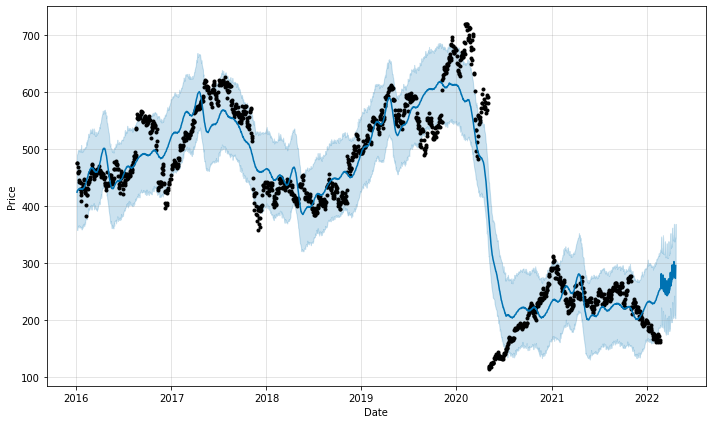

In [534]:
model.plot(preds_train_VWS, xlabel = 'Date', ylabel = 'Price');

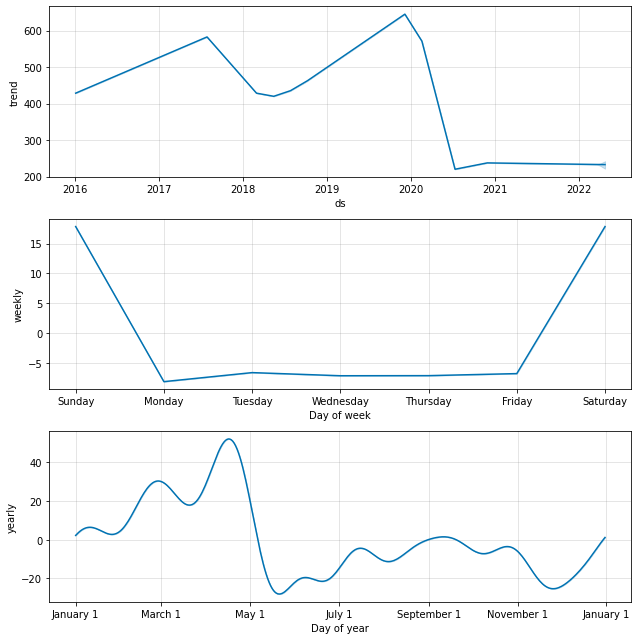

In [535]:
model.plot_components(preds_train_VWS);#shows the trend over the years, over one year and weekly 

In [536]:
plot_components_plotly(model, preds_train_VWS)#shows the trend over the years, over one year and weekly 

In [537]:
plot_plotly(model, preds_train_VWS)

##### Validating the Forecast

In [538]:
# Create a dataframe to store r2 score
PROPHET_VWS= pd.DataFrame({'r2_score': r2_score(dataset_VWS['y'], preds_train_VWS['yhat'])}, index = [0])

# Add columns in the dataframe 'evaluation_results'
PROPHET_VWS['Model'] = 'PROPHET_VWS'
PROPHET_VWS.set_index(['Model'], inplace=True)
PROPHET_VWS['mean_absolute_error'] = mean_absolute_error(dataset_VWS['y'], preds_train_VWS['yhat'])
PROPHET_VWS['mean_squared_error'] = mean_squared_error(dataset_VWS['y'], preds_train_VWS['yhat'])
PROPHET_VWS['root_mean_squared_error'] = np.sqrt(mean_squared_error(dataset_VWS['y'], preds_train_VWS['yhat']))
PROPHET_VWS['mean_absolute_percentage_error'] = np.mean(np.abs(preds_train_VWS['yhat'] - dataset_VWS['y'])
                                                               /np.abs(dataset_VWS['y']))*100
# Display the results
PROPHET_VWS

r2_score  mean_absolute_error  mean_squared_error  \
Model                                                            
PROPHET_VWS   0.88419             40.40516         2796.273987   

             root_mean_squared_error  mean_absolute_percentage_error  
Model                                                                 
PROPHET_VWS                52.879807                       13.241054

#### CROSSVALIDATION

In [539]:
from fbprophet.diagnostics import cross_validation
# Apply cross-validation on our model. This creates a forecast, for 132 days ahead (only week days), every 66 days, with 3 years of initial training data.
# As we have 6.5 years of data, this results in 21 forecasts (1 every quarter of a year, starting from 3 years -> 6 years).
crossv_VWS = cross_validation( model, initial = '768 days', period = '66 days', horizon = '132 days' )

INFO:fbprophet:Making 21 forecasts with cutoffs between 2018-03-03 00:00:00 and 2021-10-13 00:00:00


  0%|          | 0/21 [00:00<?, ?it/s]

In [540]:
perf_VWS = performance_metrics(crossv_VWS )
perf_VWS.tail()

horizon           mse        rmse         mae      mape     mdape  \
114 128 days  58694.502652  242.269484  200.059416  0.785370  0.376310   
115 129 days  57362.481189  239.504658  197.657406  0.765713  0.370025   
116 130 days  58172.252811  241.189247  199.710793  0.769568  0.376310   
117 131 days  59233.294461  243.378911  201.740351  0.779292  0.381894   
118 132 days  59189.046511  243.287991  201.375395  0.775538  0.379219   

     coverage  
114  0.145486  
115  0.151042  
116  0.145833  
117  0.145833  
118  0.151042

In [541]:
# Evaluate the mean MAPE for our forecasts.
crossv_mape_VWS = round( 100 * perf_VWS['mape'].mean(), 2 )
print( f'Cross validation MAPE: %' , crossv_mape_VWS)

Cross validation MAPE: % 60.48


## Summary

In [542]:
Validation_EDPR= pd.concat([MA_SES_EDPR, MA_HoltWinters_EDPR,R_arima_EDPR, NEURAL_NET,PROPHET])
Validation_EDPR

r2_score  mean_absolute_error  mean_squared_error  \
Model                                                                
MA_SES          -1.544235             2.266378            6.837497   
MA_Holt-Winters -0.904174             1.970772            5.117367   
ARIMA            0.938885             0.278017            0.183420   
NEURAL_NET       0.623960             0.547937            0.512146   
PROPHET          0.965677             0.663159            1.083486   

                 root_mean_squared_error  mean_absolute_percentage_error  
Model                                                                     
MA_SES                          2.614861                       10.340887  
MA_Holt-Winters                 2.262160                        9.089744  
ARIMA                           0.428276                        1.314665  
NEURAL_NET                      0.715644                        2.537959  
PROPHET                         1.040906                        5.228868

In [543]:
Validation_VWS= pd.concat([MA_SES_VWS, MA_HoltWinters_VWS,R_arima_VWS, NEURAL_NET_VWS, PROPHET_VWS])
Validation_VWS

r2_score  mean_absolute_error  mean_squared_error  \
Model                                                                
MA_SES          -0.314209            29.832657         1353.002663   
MA_Holt-Winters -0.077997            27.773240         1109.817661   
ARIMA            0.950279             4.135462           44.733512   
NEURAL_NET_VWS   0.634335            11.533640          183.118992   
PROPHET_VWS      0.884190            40.405160         2796.273987   

                 root_mean_squared_error  mean_absolute_percentage_error  
Model                                                                     
MA_SES                         36.783185                       15.486820  
MA_Holt-Winters                33.313926                       14.007413  
ARIMA                           6.688312                       89.924217  
NEURAL_NET_VWS                 13.532147                        6.948343  
PROPHET_VWS                    52.879807                       13.241054

## Complementary Reading

Reference: Efstathopoulos g. (2020) Python for Finance, Part I: Yahoo & Google Finance API, pandas, and matplotlib 
Available at: URL <a href="https://www.learndatasci.com/tutorials/python-finance-part-yahoo-finance-api-pandas-matplotlib/ ">https://www.learndatasci.com/tutorials/python-finance-part-yahoo-finance-api-pandas-matplotlib/ </a>(Accessed 14 October 2021).  

Reference: Witham, J. (2020) The Imperative For A 24/7 Renewable Energy World, Forbes. 
Available at: URL <a href="https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#remote-data-yahoo">https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#remote-data-yahoo/ </a>(Accessed 14 October 2021).  

Reference: Norris, E. (2021) "Why Did My Stock's Ticker Change?", Investopedia. 
Available at: URL <a href="https://www.investopedia.com/ask/answers/why-did-my-stocks-ticker-change/">https://www.investopedia.com/ask/answers/why-did-my-stocks-ticker-change/ </a>(Accessed 14 October 2021).  

Reference: Mahgoub, A. (2021) "Stock Prediction using Regression Algorithm in Python", Medium. 
Available at: URL <a href="https://medium.com/codex/stock-predication-using-regression-algorithm-in-python-fb8b426453b9/">https://medium.com/codex/stock-predication-using-regression-algorithm-in-python-fb8b426453b9</a>(Accessed 25 Feb 2022). 

Reference: Prabhakaran, S. (2019) "Augmented Dickey Fuller Test (ADF Test) – Must Read Guide", Medium. 
Available at: URL <a href="https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/#:~:text=Augmented%20Dickey%20Fuller%20test%20(ADF%20Test)%20is%20a%20common%20statistical,the%20stationary%20of%20a%20series.">https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/#:~:text=Augmented%20Dickey%20Fuller%20test%20(ADF%20Test)%20is%20a%20common%20statistical,the%20stationary%20of%20a%20series.</a>

Reference: Masum, M. (2020) "Time Series Analysis: Identifying AR and MA using ACF and PACF Plots", Medium. 
Available at: URL <a href="https://towardsdatascience.com/identifying-ar-and-ma-terms-using-acf-and-pacf-plots-in-time-series-forecasting-ccb9fd073db8">https://towardsdatascience.com/identifying-ar-and-ma-terms-using-acf-and-pacf-plots-in-time-series-forecasting-ccb9fd073db8</a> (Accessed 21 March 2022).  

Reference: Zvornicanin E. (2021) "Choosing the best q and p from ACF and PACF plots in ARMA-type modeling", Baeldung. 
Available at: URL <a href="https://www.baeldung.com/cs/acf-pacf-plots-arma-modeling">https://www.baeldung.com/cs/acf-pacf-plots-arma-modeling</a> (Accessed 21 March 2022). 


Reference: Prabhakaran S. (2021) "ARIMA Model – Complete Guide to Time Series Forecasting in Python", Machinelearningplus. 
Available at: URL <a href="https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/">https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/</a> (Accessed 21 March 2022). 

Reference: Daitan (2019) "A Visual Guide to Time Series Decomposition Analysis", Betterprogramming 
Available at: URL <a href="https://betterprogramming.pub/a-visual-guide-to-time-series-decomposition-analysis-a1472bb9c930">https://betterprogramming.pub/a-visual-guide-to-time-series-decomposition-analysis-a1472bb9c930</a> (Accessed 14 April 2022).

Reference: Zach (2021) "Augmented Dickey-Fuller Test in Python (With Example)", Statology.org 
Available at: URL <a href="https://www.statology.org/dickey-fuller-test-python/">https://www.statology.org/dickey-fuller-test-python/</a> (Accessed 14 April 2022).

Reference: Shao, V.(2020) "Forecasting with a Time Series Model using Python: Part One", Bounteous
Available at: URL <a href="https://www.bounteous.com/insights/2020/09/15/forecasting-time-series-model-using-python-part-one/">https://www.bounteous.com/insights/2020/09/15/forecasting-time-series-model-using-python-part-one/</a> (Accessed 15 April 2022).
